<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore Housing Data and Kaggle Challenge

## Problem Statement

When it comes to property prices in Singapore, the on-ground sentiments we often hear are — "so expensive", "so far", "is it worth the price?"

Yet, there still seems to be a preference amongst some to stay in the central region due to convenience and general accessibility. In our study, we examine how the price of resale HDB flats, particularly in the central region, are influenced by various factors like floor area, age of HDB flat, maximum floor level, proximity to amenities and public transport connectivity.

Ultimately, we aim to address the following question: **"Are resale prices of central region HDBs influenced primarily by its location?"**

In doing so, we hope to empower our target audience to make more calculated and informed decisions on housing whether it's young couples buying their first flats, or older families looking to sell their flats

## Importing Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statistics
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-pastel')
pd.set_option('display.max_rows', 200)

## Import Cleaned Datasets

In [49]:
train_clean = pd.read_csv('datasets/train_clean.csv')
test_clean = pd.read_csv('datasets/test_clean.csv')

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|id|*integer*|train-clean|The property's sale price in Singapore dollars|
|tranc_yearmonth|*str*|train-clean|Year and month of the resale transaction, e.g. 2015-02|
|town|*str*|train-clean|HDB township where the flat is located, e.g. BUKIT MERAH|
|flat_type|*str*|train-clean|Type of the resale flat unit, e.g. 3 ROOM|
|block|*str*|train-clean|Block number of the resale flat, e.g. 454|
|street_name|*str*|train-clean|Street name where the resale flat resides, e.g. TAMPINES ST 42|
|storey_range|*str*|train-clean|Floor level (range) of the resale flat unit, e.g. 07 TO 09|
|floor_area_sqm|*float*|train-clean|Floor area of the resale flat unit in square metres|
|flat_model|*str*|train-clean|HDB model of the resale flat, e.g. Multi Generation|
|lease_commence_date|*integer*|train-clean|Commencement year of the flat unit's 99-year lease|
|resale_price|*float*|train-clean|The property's sale price in Singapore dollars|
|tranc_year|*integer*|train-clean|Year of resale transaction|
|tranc_month|*integer*|train-clean|Month of resale transaction|
|mid_storey|*integer*|train-clean|Median value of storey_range|
|lower|*integer*|train-clean|Lower value of storey_range|
|upper|*integer*|train-clean|Upper value of storey_range|
|mid|*integer*|train-clean|Middle value of storey_range|
|full_flat_type|*str*|train-clean|Combination of flat_type and flat_model|
|address|*str*|train-clean|Combination of block and street_name|
|floor_area_sqft|*float*|train-clean|Floor area of the resale flat unit in square feet|
|price_per_sqft|*float*|train-clean|Price per square feet|
|hdb_age|*integer*|train-clean|Number of years from lease_commence_date to present year|
|max_floor_lvl|*integer*|train-clean|Highest floor of the resale flat|
|year_completed|*integer*|train-clean|Year which construction was completed for resale flat|
|residential|*integer*|train-clean|Boolean value if resale flat has residential units in the same block|
|commercial|*integer*|train-clean|Boolean value if resale flat has commercial units in the same block|
|market_hawker|*integer*|train-clean|Boolean value if resale flat has a market or hawker centre in the same block|
|multistorey_carpark|*integer*|train-clean|Boolean value if resale flat has a multistorey carpark in the same block|
|precinct_pavilion|*integer*|train-clean|Boolean value if resale flat has a pavilion in the same block|
|total_dwelling_units|*integer*|train-clean|Total number of residential dwelling units in the resale flat|
|1room_sold|*integer*|train-clean|Number of 1-room residential units in the resale flat|
|2room_sold|*integer*|train-clean|Number of 2-room residential units in the resale flat|
|3room_sold|*integer*|train-clean|Number of 3-room residential units in the resale flat|
|4room_sold|*integer*|train-clean|Number of 4-room residential units in the resale flat|
|5room_sold|*integer*|train-clean|Number of 5-room residential units in the resale flat|
|exec_sold|*integer*|train-clean|Number of executive type residential units in the resale flat block|
|multigen_sold|*integer*|train-clean|Number of multi-generational type residential units in the resale flat block|
|studio_apartment_sold|*integer*|train-clean|Number of studio apartment type residential units in the resale flat block|
|1room_rental|*integer*|train-clean|Number of 1-room rental residential units in the resale flat block|
|2room_rental|*integer*|train-clean|Number of 2-room rental residential units in the resale flat block|
|3room_rental|*integer*|train-clean|Number of 3-room rental residential units in the resale flat block|
|other_room_rental|*integer*|train-clean|Number of "other" type rental residential units in the resale flat block|
|postal|*str*|train-clean|Postal code of the resale flat block|
|latitude|*float*|train-clean|Latitude based on postal code|
|longitude|*float*|train-clean|Longitude based on postal code|
|planning_area|*str*|train-clean|Government planning area that the flat is located|
|mall_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest mall|
|mall_within_500m|*float*|train-clean|Number of malls within 500 metres|
|mall_within_1km|*float*|train-clean|Number of malls within 1 kilometre|
|mall_within_2km|*float*|train-clean|Number of malls within 2 kilometres|
|hawker_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest hawker centre|
|hawker_within_500m|*float*|train-clean|Number of hawker centres within 500 metres|
|hawker_within_1km|*float*|train-clean|Number of hawker centres within 1 kilometre|
|hawker_within_2km|*float*|train-clean|Number of hawker centres within 2 kilometres|
|hawker_food_stalls|*integer*|train-clean|Number of hawker food stalls in the nearest hawker centre|
|hawker_market_stalls|*integer*|train-clean|Number of hawker and market stalls in the nearest hawker centre|
|mrt_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest MRT station|
|mrt_name|*str*|train-clean|Name of the nearest MRT station|
|bus_interchange|*integer*|train-clean|Boolean value if the nearest MRT station is also a bus interchange|
|mrt_interchange|*integer*|train-clean|Boolean value if the nearest MRT station is a train interchange station|
|mrt_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest MRT station|
|mrt_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest MRT station|
|bus_stop_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest bus stop|
|bus_stop_name|*str*|train-clean|Name of the nearest bus stop|
|bus_stop_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest bus stop|
|bus_stop_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest bus stop|
|pri_sch_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest primary school|
|pri_sch_name|*integer*|train-clean|Name of the nearest primary school|
|vacancy|*integer*|train-clean|Number of vacancies in the nearest primary school|
|pri_sch_affiliation|*integer*|train-clean|Boolean value if the nearest primary school has a secondary school affiliation|
|pri_sch_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest primary school|
|pri_sch_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest primary school|
|sec_sch_nearest_dist|*float*|train-clean|Distance (in metres) to the nearest secondary school|
|sec_sch_name|*integer*|train-clean|Name of the nearest secondary school|
|cutoff_point|*integer*|train-clean|PSLE cutoff point of the nearest secondary school|
|affiliation|*integer*|train-clean|Boolean value if the nearest secondary school has an primary school affiliation|
|sec_sch_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest secondary school|
|sec_sch_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest secondary school|
|region|*integer*|train-clean|Distribution of Central Region and Outside of Central Region|

## Defining the List

In [50]:
import pandas as pd

# Lists of towns for each region
central_regions = ['Bishan', 'Bukit Merah', 'Bukit Timah', 'Downtown Core', 'Geylang', 'Kallang', 'Marine Parade', 'Novena', 'Outram', 'Queenstown', 'Rochor', 'Tanglin', 'Toa Payoh']
non_central_regions = ['Ang Mo Kio', 'Bedok', 'Bukit Batok', 'Bukit Panjang', 'Changi', 'Choa Chu Kang', 'Clementi', 'Hougang', 'Jurong East', 'Jurong West', 'Pasir Ris', 'Punggol', 'Sembawang', 'Sengkang', 'Serangoon', 'Tampines', 'Western Water Catchment', 'Woodlands', 'Yishun']

# Convert town names to uppercase for consistent comparison
train_clean['town'] = train_clean['town'].str.upper()

# Define a function to classify each town as Central or Non-Central
def classify_region(town):
    town = town.upper()  # Ensure case-insensitive comparison
    if town in [t.upper() for t in central_regions]:
        return 'Central'
    elif town in [t.upper() for t in non_central_regions]:
        return 'Non-Central'
    else:
        return 'Other'  # For towns that might not be in either list

# Apply the function to the 'town' column to create a new 'Region' column
train_clean['Region'] = train_clean['town'].apply(classify_region)

# Now, df includes a 'Region' column with values 'Central', 'Non-Central', or 'Other'


## Exploratory Data Analysis

In [51]:
#Summary Statistics (train)
train_clean.describe()

id  resale_price     tranc_year     mid_storey  \
count  150634.000000  1.506340e+05  150634.000000  150634.000000   
mean    93047.887496  4.491615e+05    2016.489551       8.284823   
std     53679.906247  1.433076e+05       2.752396       5.508074   
min         1.000000  1.500000e+05    2012.000000       2.000000   
25%     46469.250000  3.470000e+05    2014.000000       5.000000   
50%     93077.500000  4.200000e+05    2017.000000       8.000000   
75%    139574.750000  5.200000e+05    2019.000000      11.000000   
max    185966.000000  1.258000e+06    2021.000000      50.000000   

               lower          upper            mid  floor_area_sqft  \
count  150634.000000  150634.000000  150634.000000    150634.000000   
mean        7.248370       9.321275       8.284823      1046.235290   
std         5.515155       5.507364       5.508074       262.674321   
min         1.000000       3.000000       2.000000       333.684000   
25%         4.000000       6.000000       5.000000       807.300000   
50%         7.000000       9.000000       8.000000      1022.580000   
75%        10.000000      12.000000      11.000000      1205.568000   
max        49.000000      51.000000      50.000000      3013.920000   

             hdb_age  max_floor_lvl  ...  hawker_market_stalls  \
count  150634.000000  150634.000000  ...         150634.000000   
mean       28.551536      15.139816  ...             58.138322   
std        12.138829       6.232492  ...             55.495519   
min         2.000000       2.000000  ...              0.000000   
25%        20.000000      12.000000  ...              0.000000   
50%        29.000000      13.000000  ...             52.000000   
75%        37.000000      16.000000  ...             99.000000   
max        55.000000      50.000000  ...            477.000000   

       mrt_nearest_distance  bus_interchange  mrt_interchange  \
count         150634.000000    150634.000000    150634.000000   
mean             765.007872         0.546364         0.264024   
std              429.366039         0.497847         0.440814   
min               21.971410         0.000000         0.000000   
25%              458.266301         0.000000         0.000000   
50%              682.621343         1.000000         0.000000   
75%              975.734180         1.000000         1.000000   
max             3544.504228         1.000000         1.000000   

       bus_stop_nearest_distance  pri_sch_nearest_distance        vacancy  \
count              150634.000000             150634.000000  150634.000000   
mean                  115.258966                395.172974      55.368190   
std                    55.572855                234.760931      17.903918   
min                     9.001285                 45.668324      20.000000   
25%                    75.032491                227.083163      44.000000   
50%                   107.765999                348.876691      54.000000   
75%                   146.652409                502.179385      67.000000   
max                   443.964584               3305.841039     110.000000   

       sec_sch_nearest_dist   cutoff_point    affiliation  
count         150634.000000  150634.000000  150634.000000  
mean             508.533220     210.146428       0.031879  
std              309.066265      20.010489       0.175677  
min               38.913475     188.000000       0.000000  
25%              290.285883     188.000000       0.000000  
50%              447.377670     208.000000       0.000000  
75%              644.284099     224.000000       0.000000  
max             3638.977233     260.000000       1.000000  

[8 rows x 40 columns]

In [52]:
#Summary Statistics (test)
test_clean.describe()

id    tranc_year    mid_storey         lower         upper  \
count   16737.000000  16737.000000  16737.000000  16737.000000  16737.000000   
mean    92253.767342   2016.462568      8.276394      7.237737      9.315050   
std     53302.038393      2.745399      5.503939      5.512181      5.502442   
min         7.000000   2012.000000      2.000000      1.000000      3.000000   
25%     46550.000000   2014.000000      5.000000      4.000000      6.000000   
50%     91830.000000   2017.000000      8.000000      7.000000      9.000000   
75%    137789.000000   2019.000000     11.000000     10.000000     12.000000   
max    185967.000000   2021.000000     50.000000     49.000000     51.000000   

                mid  floor_area_sqft       hdb_age  max_floor_lvl  \
count  16737.000000     16737.000000  16737.000000   16737.000000   
mean       8.276394      1043.288014     28.658780      15.130011   
std        5.503939       263.155328     12.170893       6.126188   
min        2.000000       333.684000      2.000000       2.000000   
25%        5.000000       796.536000     20.000000      12.000000   
50%        8.000000      1022.580000     30.000000      13.000000   
75%       11.000000      1205.568000     37.000000      16.000000   
max       50.000000      2863.224000     55.000000      50.000000   

       market_hawker  ...  hawker_market_stalls  mrt_nearest_distance  \
count        16737.0  ...          16737.000000          16737.000000   
mean             0.0  ...             57.788971            766.780730   
std              0.0  ...             55.047424            430.837778   
min              0.0  ...              0.000000             21.971410   
25%              0.0  ...              0.000000            458.361406   
50%              0.0  ...             52.000000            685.933955   
75%              0.0  ...             99.000000            980.990779   
max              0.0  ...            477.000000           3544.504228   

       bus_interchange  mrt_interchange  bus_stop_nearest_distance  \
count     16737.000000     16737.000000               16737.000000   
mean          0.557209         0.265101                 114.754425   
std           0.496731         0.441400                  55.719310   
min           0.000000         0.000000                   9.001285   
25%           0.000000         0.000000                  74.220098   
50%           1.000000         0.000000                 106.753391   
75%           1.000000         1.000000                 145.936388   
max           1.000000         1.000000                 443.964584   

       pri_sch_nearest_distance       vacancy  sec_sch_nearest_dist  \
count              16737.000000  16737.000000          16737.000000   
mean                 395.119993     55.359204            510.960150   
std                  234.336770     17.892749            312.758000   
min                   45.668324     20.000000             45.429070   
25%                  227.739700     44.000000            292.017769   
50%                  347.207319     54.000000            448.018148   
75%                  501.045376     67.000000            644.284099   
max                 3305.841039    110.000000           3636.953504   

       cutoff_point   affiliation  
count  16737.000000  16737.000000  
mean     210.146681      0.033698  
std       20.050729      0.180456  
min      188.000000      0.000000  
25%      188.000000      0.000000  
50%      208.000000      0.000000  
75%      224.000000      0.000000  
max      260.000000      1.000000  

[8 rows x 39 columns]

School-related stats

In [53]:
# Determine the average PSLE cutoff point of the nearest secondary school in each town
# Calculate the mean cutoff point for each town
mean_cutoff_points = train_clean.groupby('town')['cutoff_point'].mean().reset_index()

# Rename the columns for clarity
mean_cutoff_points.columns = ['Town', 'Mean Cutoff Point']

# Display the result
print(mean_cutoff_points)

               Town  Mean Cutoff Point
0        ANG MO KIO         221.842067
1             BEDOK         202.064669
2            BISHAN         213.242076
3       BUKIT BATOK         210.967633
4       BUKIT MERAH         213.811753
5     BUKIT PANJANG         198.666901
6       BUKIT TIMAH         248.571816
7      CENTRAL AREA         216.246597
8     CHOA CHU KANG         220.322403
9          CLEMENTI         218.576934
10          GEYLANG         206.624937
11          HOUGANG         211.585705
12      JURONG EAST         221.884726
13      JURONG WEST         205.710855
14  KALLANG/WHAMPOA         202.264516
15    MARINE PARADE         225.000000
16        PASIR RIS         205.635734
17          PUNGGOL         208.517387
18       QUEENSTOWN         216.793254
19        SEMBAWANG         188.000000
20         SENGKANG         221.552715
21        SERANGOON         208.575728
22         TAMPINES         208.331239
23        TOA PAYOH         223.079510
24        WOODLANDS      

In [54]:
# Determine the 75th percentile of PSLE cutoff point of the nearest secondary school in each town
# Define a function to calculate the 75th percentile
def q3(x):
    return x.quantile(0.75)

# Calculate the 75th percentile cutoff point for each town
q3_cutoff_points = train_clean.groupby('town')['cutoff_point'].apply(q3).reset_index()

# Rename the columns for clarity
q3_cutoff_points.columns = ['Town', '75th Percentile Cutoff Point']

# Display the result
print(q3_cutoff_points)

               Town  75th Percentile Cutoff Point
0        ANG MO KIO                         232.0
1             BEDOK                         212.0
2            BISHAN                         232.0
3       BUKIT BATOK                         223.0
4       BUKIT MERAH                         235.0
5     BUKIT PANJANG                         206.0
6       BUKIT TIMAH                         260.0
7      CENTRAL AREA                         260.0
8     CHOA CHU KANG                         244.0
9          CLEMENTI                         231.0
10          GEYLANG                         224.0
11          HOUGANG                         228.0
12      JURONG EAST                         232.0
13      JURONG WEST                         221.0
14  KALLANG/WHAMPOA                         224.0
15    MARINE PARADE                         225.0
16        PASIR RIS                         215.0
17          PUNGGOL                         226.0
18       QUEENSTOWN                         241.0


#### Investigate trends in the data

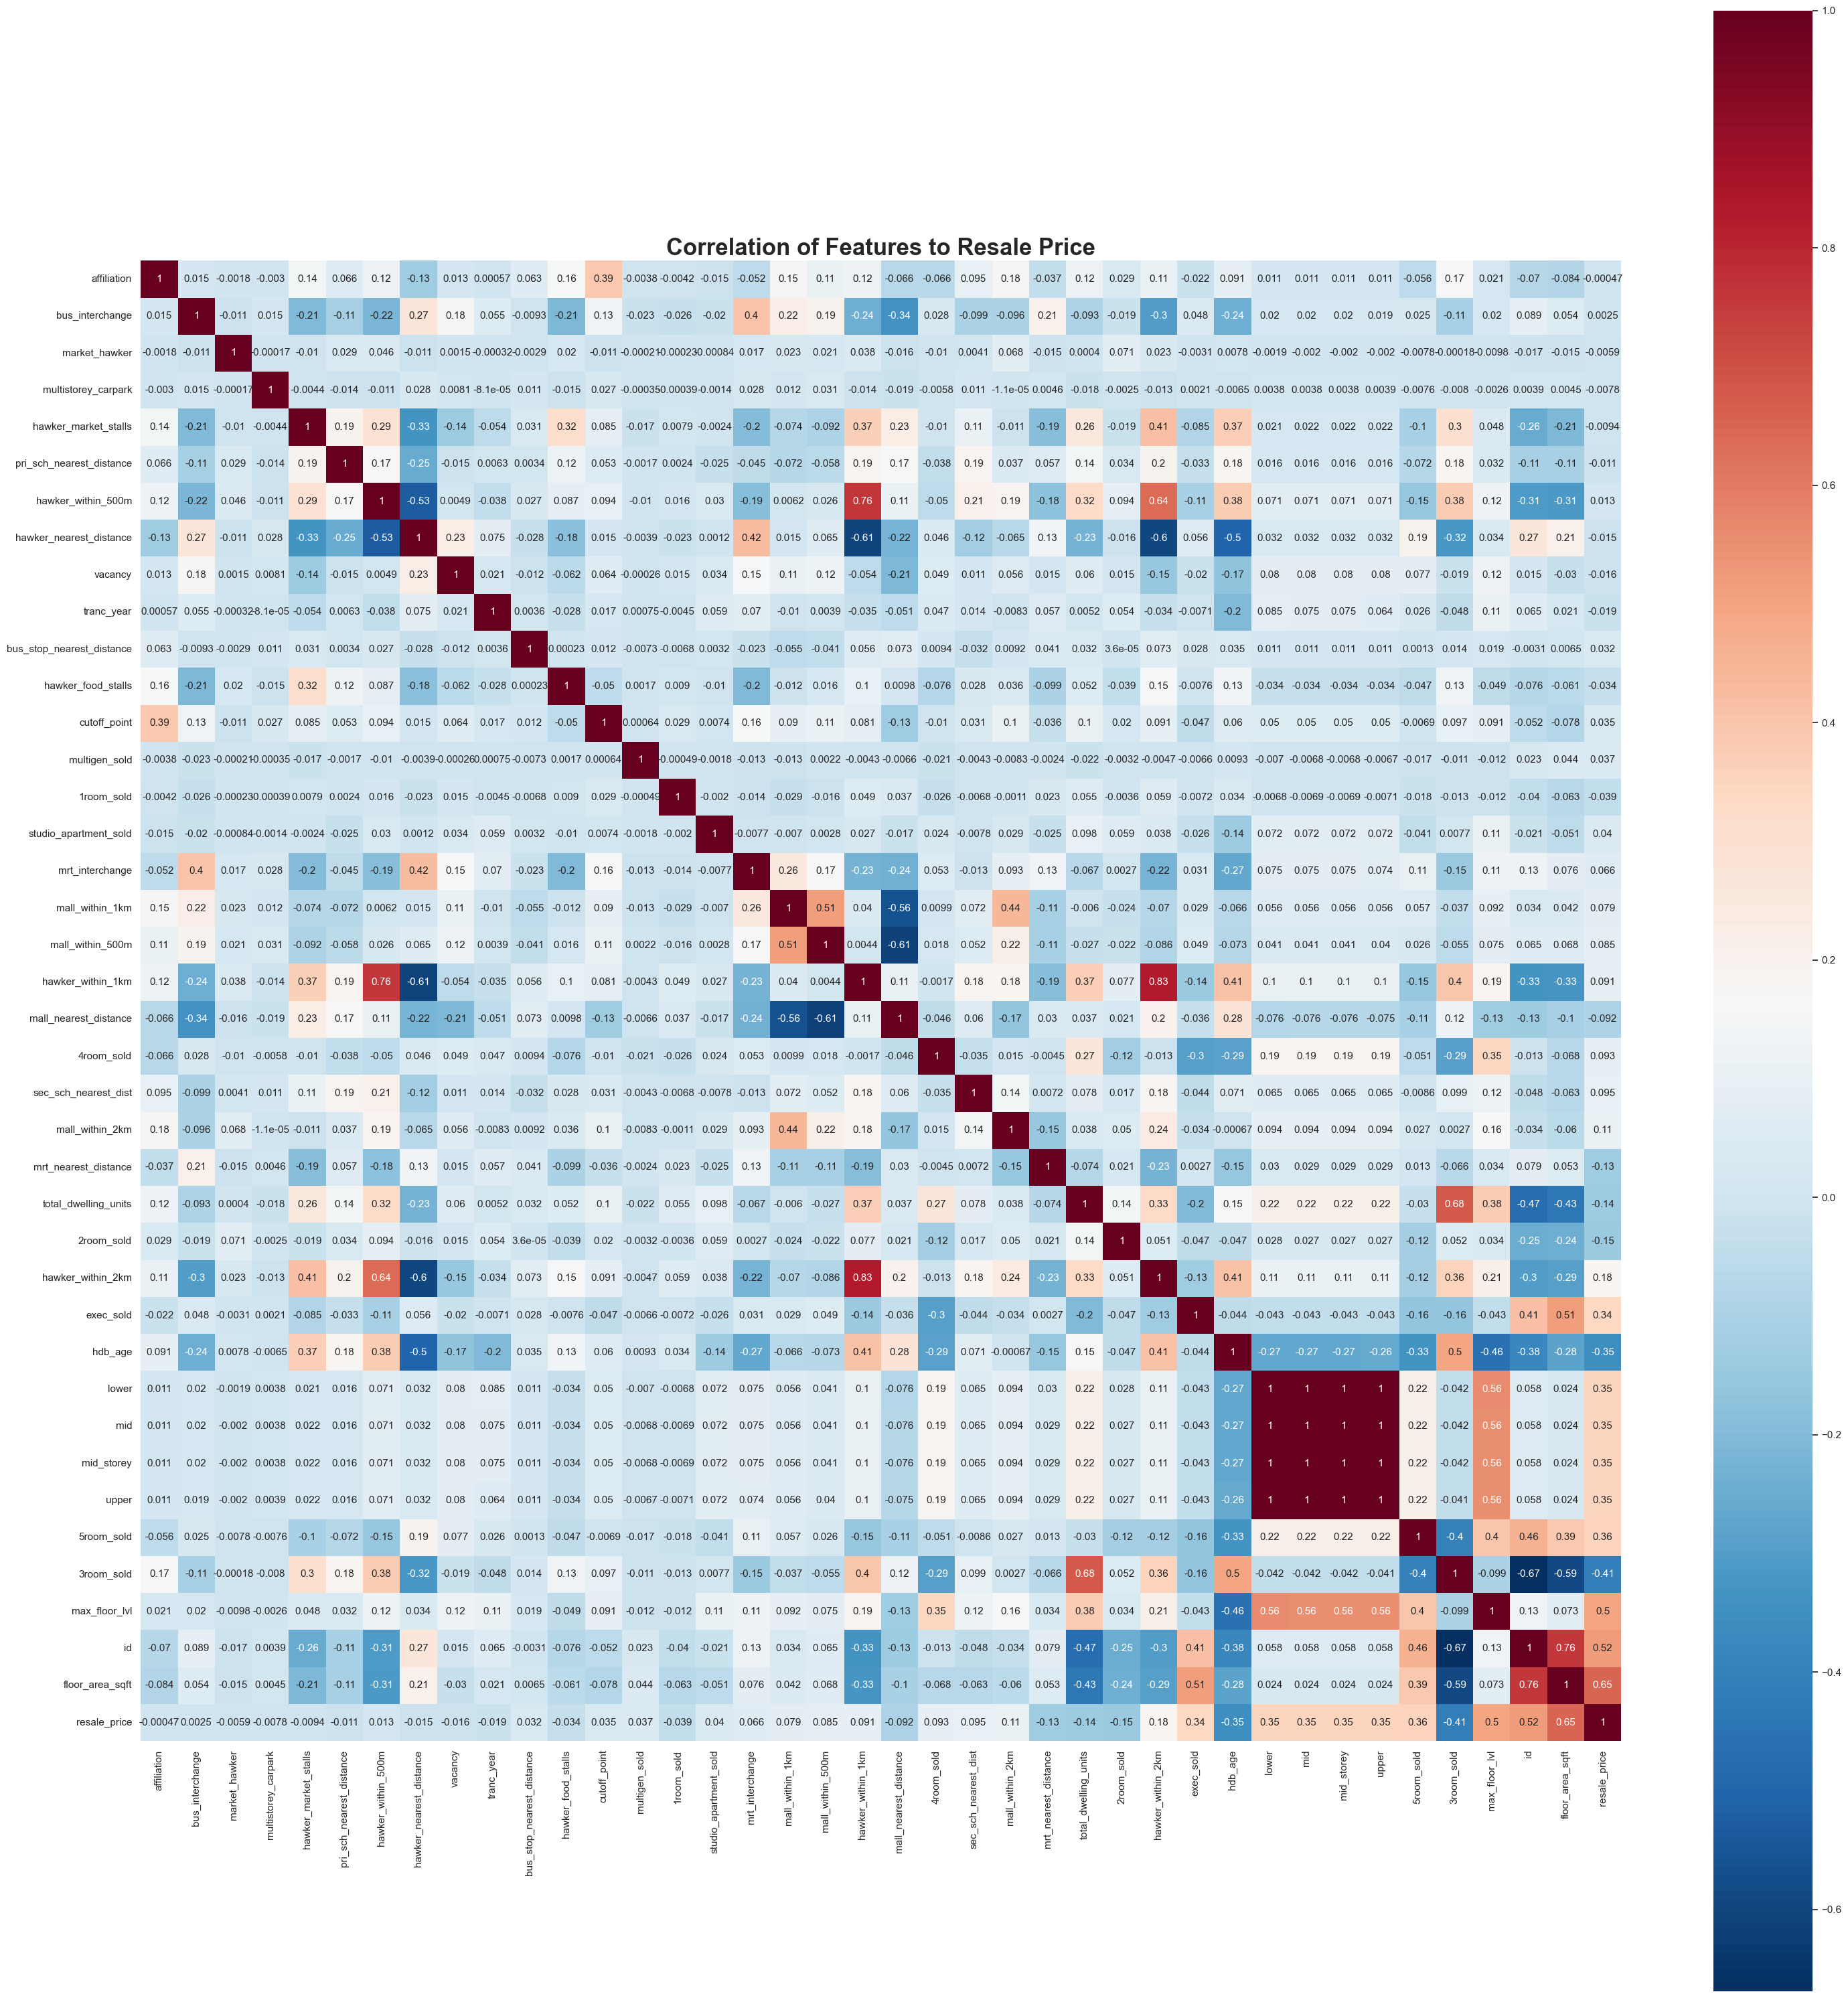

In [55]:
#Generic heatmap to determine correlation
#[rationale: resale_price had strong correlation to the following features that might be contributory to our study - hdb_age, max_floor_lvl, floor_area_sqft]
plt.figure(figsize=(30, 30))
sns.heatmap(train_clean[train_clean.corr().abs()['resale_price'].sort_values().index].corr(), annot=True, annot_kws={"size": 11}, cmap='RdBu_r', square=True)
plt.title('Correlation of Features to Resale Price', fontsize = 25, fontweight='bold')
plt.tight_layout()
plt.show()

Numerical Variables 

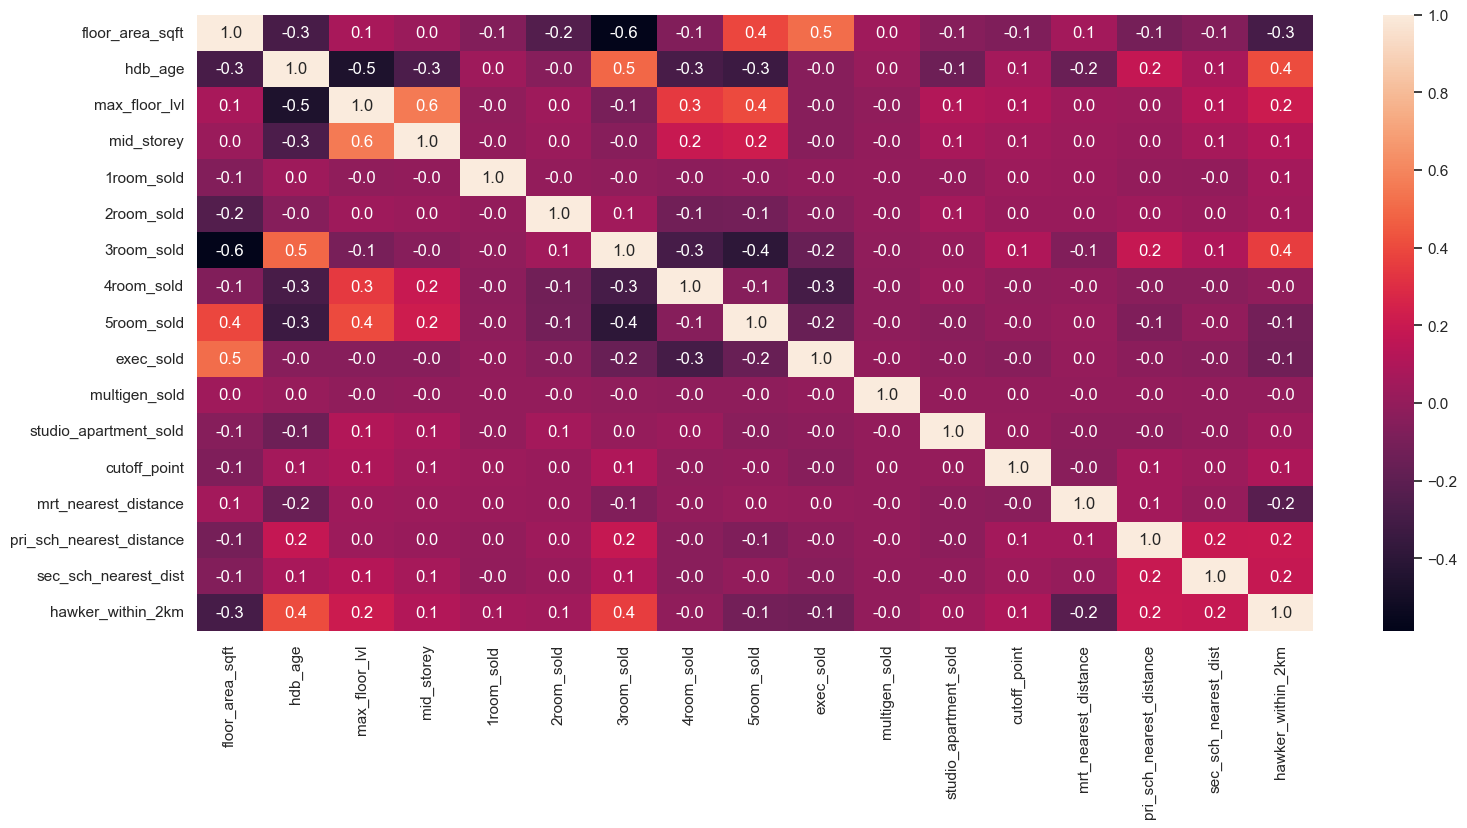

In [56]:
numeric_train = train_clean.filter(['floor_area_sqft','hdb_age','max_floor_lvl',
          'mid_storey','1room_sold','2room_sold','3room_sold','4room_sold',
          '5room_sold','exec_sold','multigen_sold','studio_apartment_sold',
          'cutoff_point','mrt_nearest_distance','pri_sch_nearest_distance',
          'sec_sch_nearest_dist','hawker_within_2km'], axis=1)

# Heatmap of all numeric features (Correlating to resale_price)
hdb_correlations = numeric_train.corr();
plt.figure(figsize = (18,8))
sns.heatmap(hdb_correlations, annot=True, fmt=".1f");

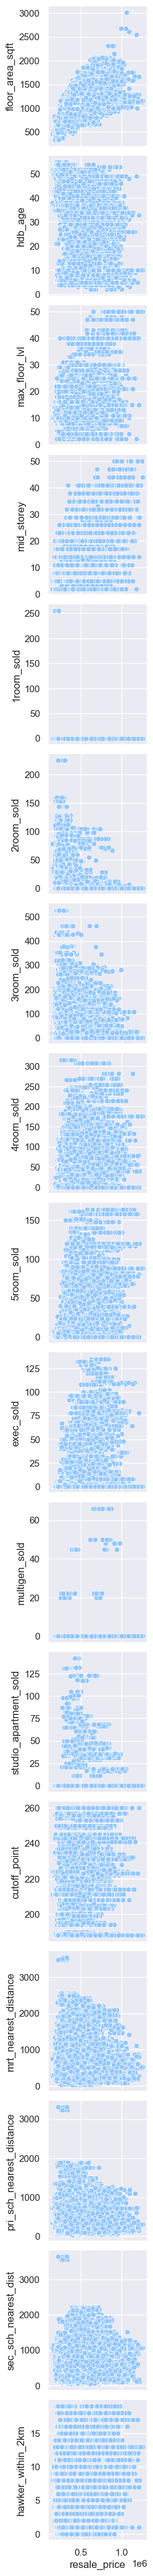

In [57]:
#Pairplot of all numeric values (Correlating to resale_price)
y_vars = ['floor_area_sqft','hdb_age','max_floor_lvl',
          'mid_storey','1room_sold','2room_sold','3room_sold','4room_sold',
          '5room_sold','exec_sold','multigen_sold','studio_apartment_sold',
          'cutoff_point','mrt_nearest_distance','pri_sch_nearest_distance',
          'sec_sch_nearest_dist','hawker_within_2km']

x_vars = ['resale_price']

sns.pairplot(train_clean, x_vars=x_vars, y_vars=y_vars);

#### Time-based Analysis

Text(0.5, 0, 'Resale Price (SGD$ million)')

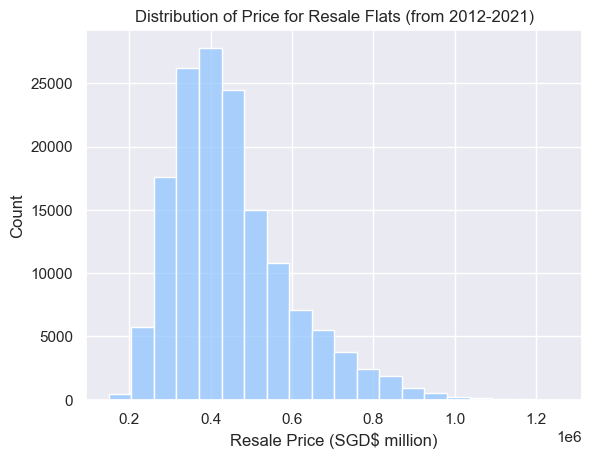

In [58]:
# Create a histogram of price of resale flats
sns.histplot(data=train_clean, x='resale_price', bins=20, stat='count')
plt.title('Distribution of Price for Resale Flats (from 2012-2021)')
plt.xlabel('Resale Price (SGD$ million)')

Text(0.5, 0.98, 'Yearly Mean Price and Transaction Volume of Resale HDBs')

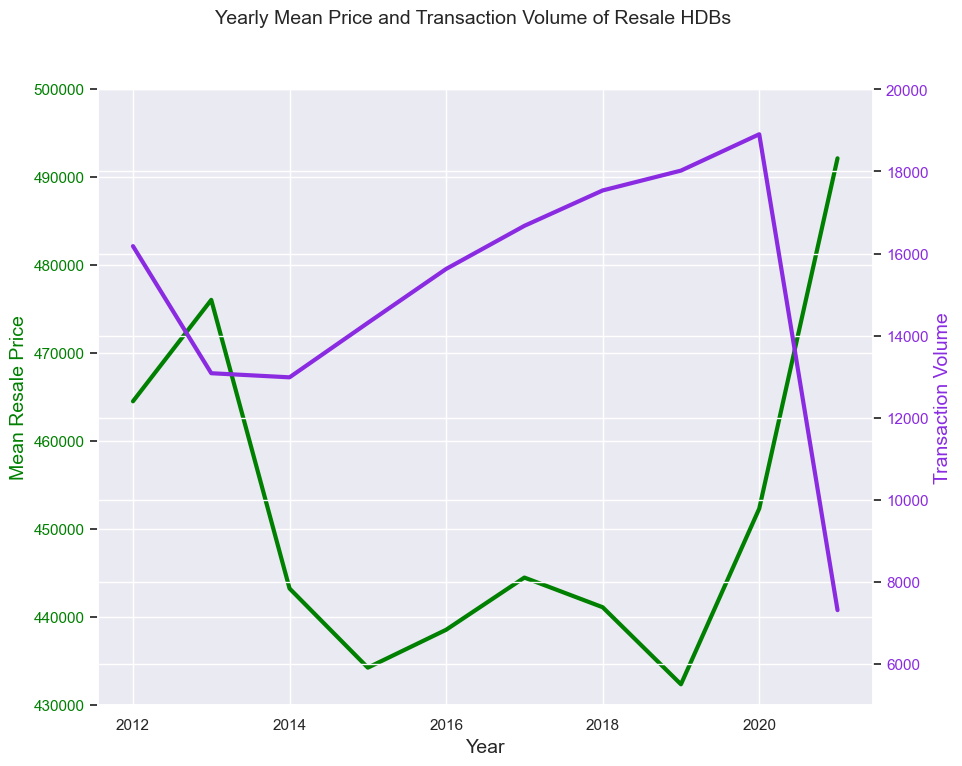

In [59]:
# Create a line plot with double y-axis to see the yearly mean price and transaction volume of resale HDBs over the years
# double y-axis line plot (y = Mean Resale Price, Transaction Volume [id]; x = Year)
# mean resale price / transaction volume from 2012 to 2021
fig, ax3 = plt.subplots(figsize=(10, 8))
ax3.set_ylim(430000, 500000);

# instantiate a second axes that shares the same x-axis
ax4 = ax3.twinx()  
ax4.set_ylim(5000, 20000);

ax3.plot(train_clean.groupby('tranc_year')['resale_price'].mean(), color='green', lw=3)
ax4.plot(train_clean.groupby('tranc_year')['id'].count(), color='blueviolet', lw=3)

ax3.set_xlabel("Year", fontsize=14)

ax3.set_ylabel("Mean Resale Price", color='green', fontsize=14)
ax3.tick_params(axis="y", labelcolor='green')

ax4.set_ylabel("Transaction Volume", color='blueviolet', fontsize=14)
ax4.tick_params(axis="y", labelcolor='blueviolet')

fig.suptitle("Yearly Mean Price and Transaction Volume of Resale HDBs", fontsize=14)

#### Location-based Analysis

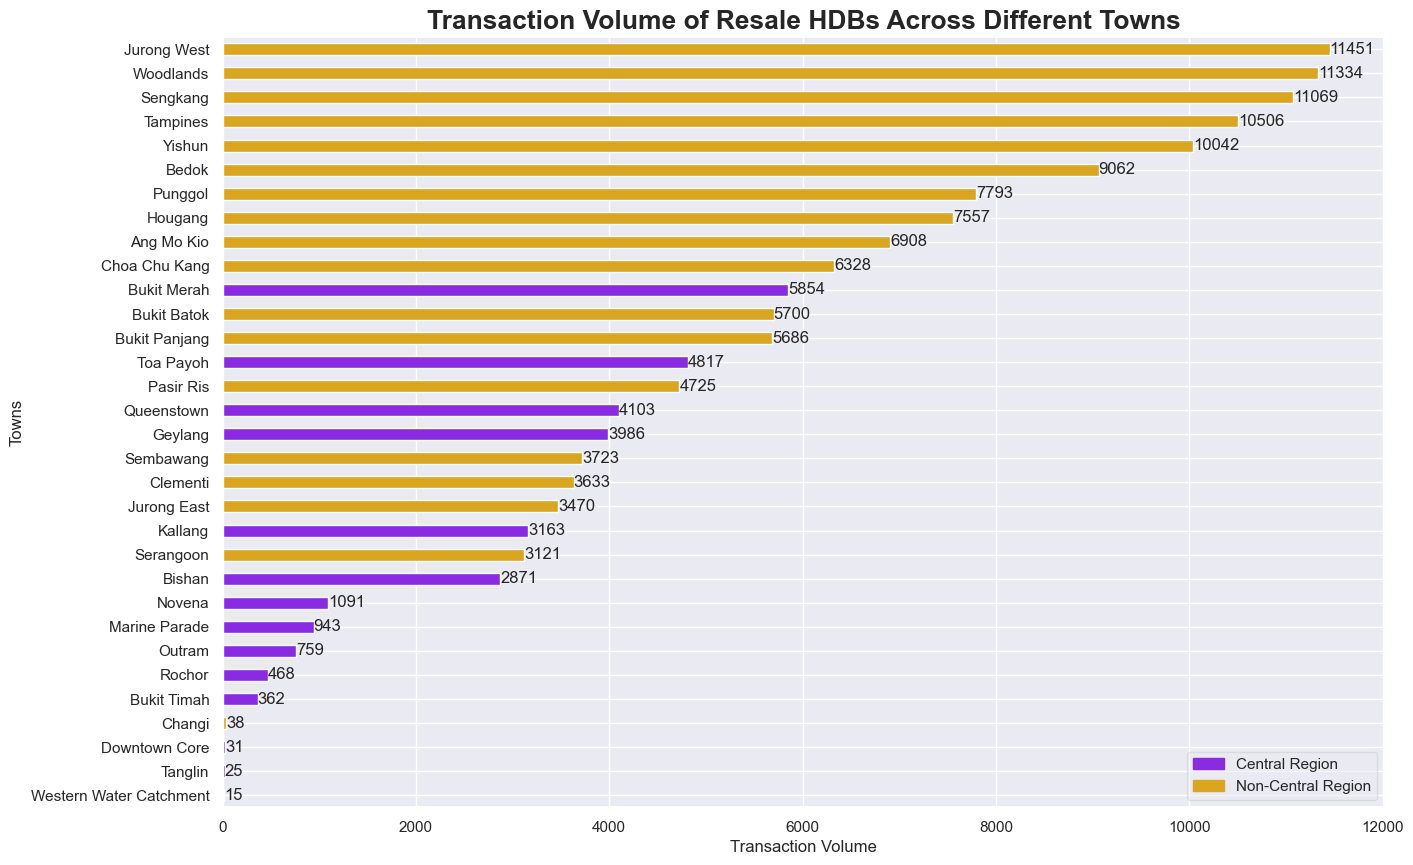

In [60]:
# Create a bar plot to show Transaction Volume of Resale HDBs (ALL)
# list of towns for colour customisation of bar plot

planning_areas_by_trans_vol = ['Western Water Catchment', 'Tanglin', 'Downtown Core', 'Changi', 'Bukit Timah', 'Rochor', 'Outram', 'Marine Parade', 'Novena', 'Bishan',
                               'Serangoon', 'Kallang', 'Jurong East', 'Clementi', 'Sembawang', 'Geylang', 'Queenstown', 'Pasir Ris', 'Toa Payoh', 'Bukit Panjang', 'Bukit Batok',
                               'Bukit Merah', 'Choa Chu Kang', 'Ang Mo Kio', 'Hougang', 'Punggol', 'Bedok', 'Yishun', 'Tampines', 'Sengkang', 'Woodlands', 'Jurong West']


# custom colours for central vs. non-central
colors_3 = ["blueviolet" if i in central_regions else "goldenrod" for i in planning_areas_by_trans_vol]

# bar plot sorted in descending order
ax6 = train_clean.groupby('planning_area')['id'].count().sort_values(ascending=True).plot(kind='barh',figsize=(15, 10), color=colors_3)
plt.title('Transaction Volume of Resale HDBs Across Different Towns', fontsize=19, fontweight='bold')
ax6.set_xlabel("Transaction Volume")
ax6.set_ylabel("Towns")
ax6.bar_label(ax6.containers[0])

# create a custom legend
cr_patch = mpatches.Patch(color='blueviolet', label='Central Region')
ncr_patch = mpatches.Patch(color='goldenrod', label='Non-Central Region')
plt.legend(handles=[cr_patch, ncr_patch], loc='lower right', framealpha=0.5, frameon=True)

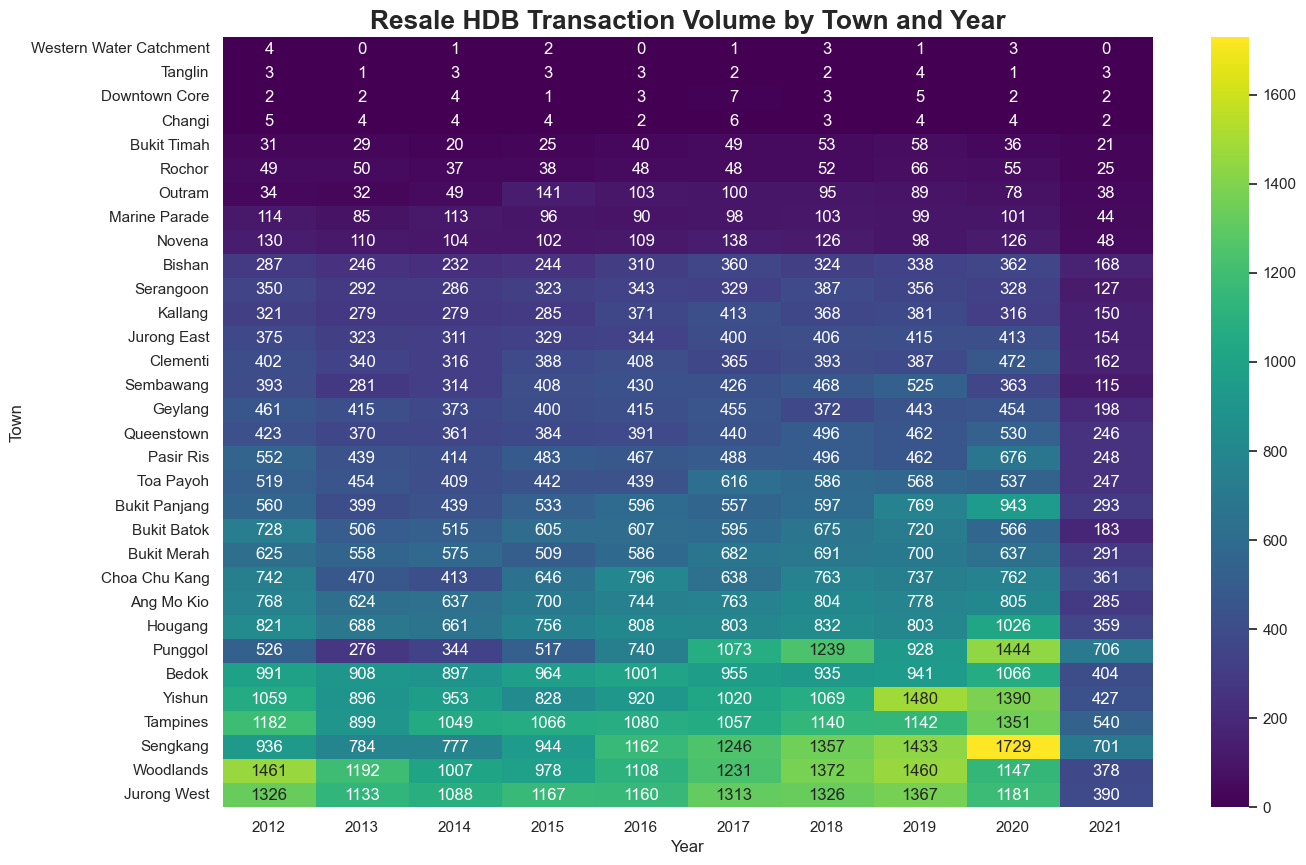

In [61]:
# Create a heatmap plot to show resale HDB transactions by Town over the years
import seaborn as sns

# Group by 'planning_area' and 'year', then count transactions
transaction_volume_by_year = train_clean.groupby(['planning_area', 'tranc_year'])['id'].count().reset_index()

# Pivot the DataFrame to have years as columns, towns as index, and transaction volumes as values
volume_pivot = transaction_volume_by_year.pivot(index='planning_area', columns='tranc_year', values='id').fillna(0)

# Sort towns by overall transaction volume
volume_pivot['total'] = volume_pivot.sum(axis=1)
volume_pivot_sorted = volume_pivot.sort_values(by='total', ascending=True)
del volume_pivot_sorted['total']  # Remove the total column after sorting

import seaborn as sns

# Assuming 'volume_pivot_sorted' from the previous example, without the 'total' column
# Heatmap of transaction volumes
plt.figure(figsize=(15, 10))
sns.heatmap(volume_pivot_sorted, annot=True, cmap='viridis', fmt="g")
plt.title('Resale HDB Transaction Volume by Town and Year', fontsize=19, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Town")
plt.show()

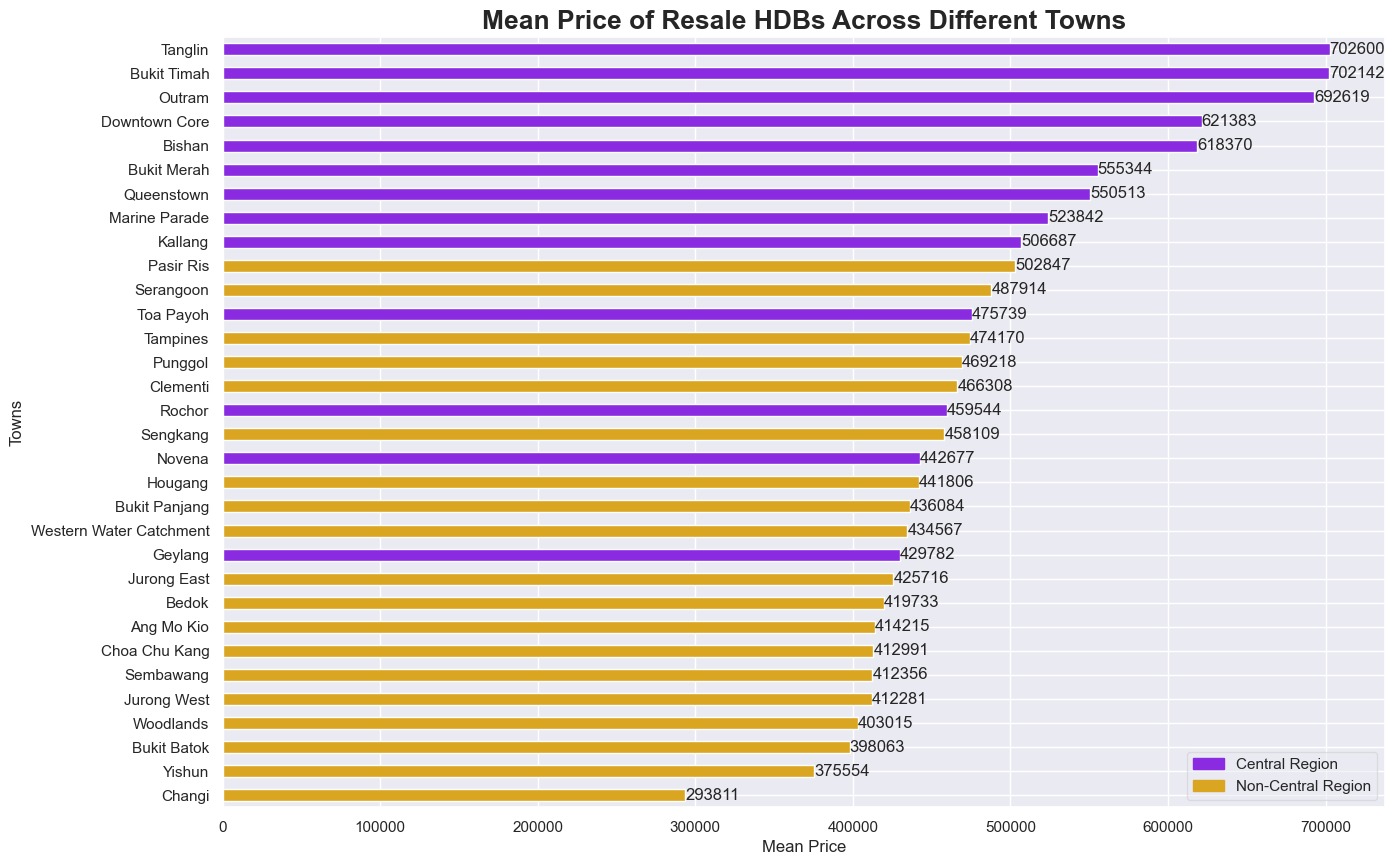

In [62]:
# Create a bar plot to show Mean Price of Resale HDBs (ALL)

planning_areas_by_price_ascending = ['Changi', 'Yishun', 'Bukit Batok', 'Woodlands', 'Jurong West', 'Sembawang', 'Choa Chu Kang', 'Ang Mo Kio', 'Bedok',
                                     'Jurong East', 'Geylang', 'Western Water Catchment', 'Bukit Panjang', 'Hougang', 'Novena', 'Sengkang', 'Rochor', 'Clementi',
                                     'Punggol', 'Tampines', 'Toa Payoh', 'Serangoon', 'Pasir Ris', 'Kallang', 'Marine Parade', 'Queenstown', 'Bukit Merah', 'Bishan',
                                     'Downtown Core', 'Outram', 'Bukit Timah', 'Tanglin'
                                     ]

cr = ['Bishan','Bukit Merah','Bukit Timah','Downtown Core','Geylang','Kallang','Marine Parade','Novena',
      'Outram','Queenstown','Rochor','Tanglin','Toa Payoh']

# custom colours for central vs. non-central
colors_4 = ["blueviolet" if i in cr else "goldenrod" for i in planning_areas_by_price_ascending]

# bar plot sorted in descending order
ax8 = train_clean.groupby('planning_area')['resale_price'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(15, 10), color=colors_4)
plt.title('Mean Price of Resale HDBs Across Different Towns', fontsize=19, fontweight='bold')
ax8.set_xlabel("Mean Price")
ax8.set_ylabel("Towns")
ax8.bar_label(ax8.containers[0])

# create a custom legend
cr_patch = mpatches.Patch(color='blueviolet', label='Central Region')
ncr_patch = mpatches.Patch(color='goldenrod', label='Non-Central Region')
plt.legend(handles=[cr_patch, ncr_patch], loc='lower right', framealpha=0.5, frameon=True)

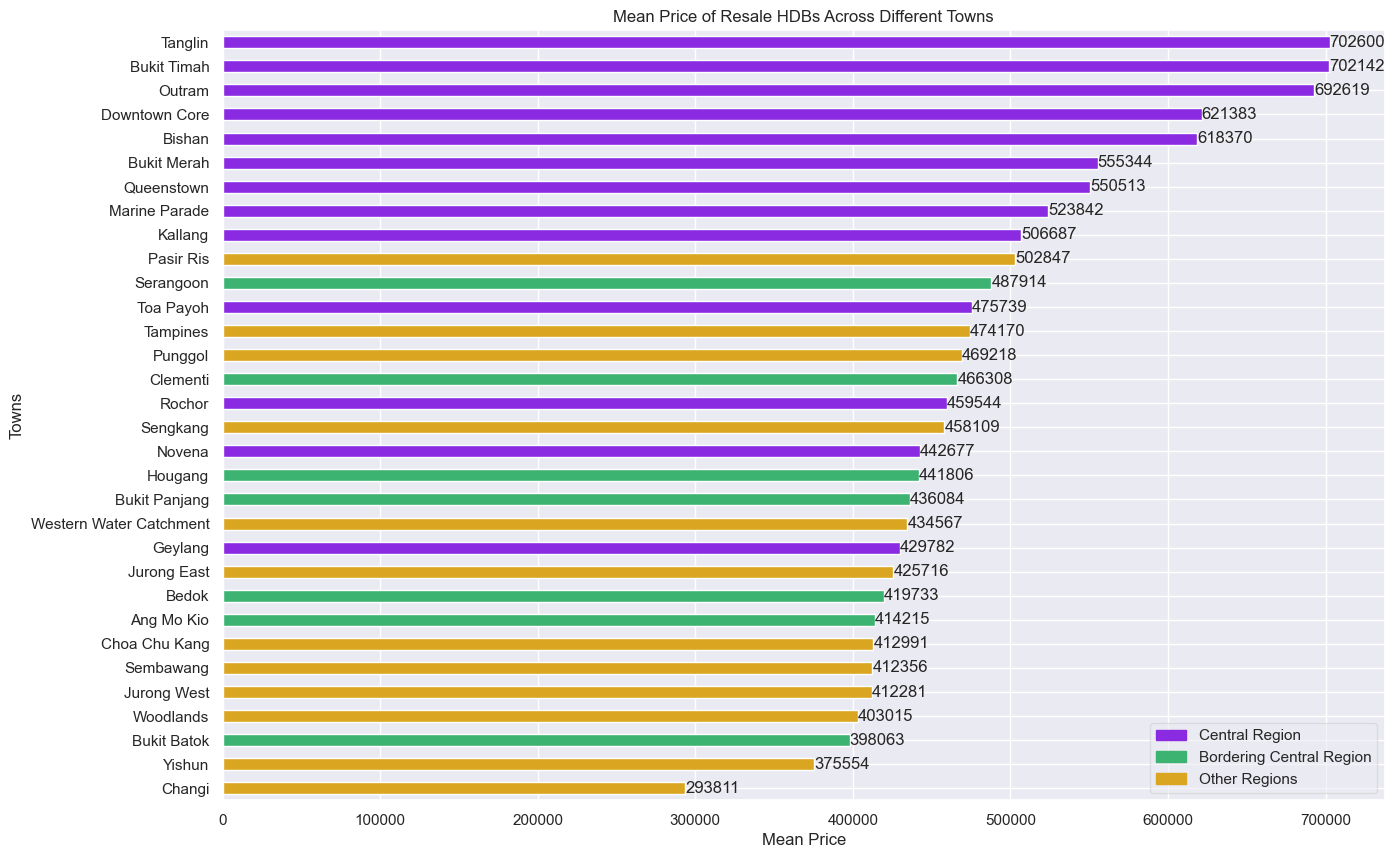

In [63]:
# Create a bar plot to show Mean Price of Resale HDBs (Central vs. Bordering Central vs. Other)
colors_5 = []

bcr = ['Ang Mo Kio', 'Bedok','Bukit Batok', 'Bukit Panjang',
       'Clementi','Hougang','Serangoon']

for i in planning_areas_by_price_ascending:
    if i in bcr:
        colors_5.append("mediumseagreen")
    elif i in cr:
        colors_5.append("blueviolet")
    else:
        colors_5.append("goldenrod")

# bar plot sorted in descending order
ax8 = train_clean.groupby('planning_area')['resale_price'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(15, 10), color=colors_5)
plt.title('Mean Price of Resale HDBs Across Different Towns')
ax8.set_xlabel("Mean Price")
ax8.set_ylabel("Towns")
ax8.bar_label(ax8.containers[0])

# create a custom legend
cr_patch = mpatches.Patch(color='blueviolet', label='Central Region')
bcr_patch = mpatches.Patch(color='mediumseagreen', label='Bordering Central Region')
ncr_patch = mpatches.Patch(color='goldenrod', label='Other Regions')
plt.legend(handles=[cr_patch, bcr_patch, ncr_patch], loc='lower right', framealpha=0.5, frameon=True)

#### Other Features

In [64]:
# add a column to determine if listing is in central or not
train_clean['central'] = train_clean['planning_area'].map(lambda x: 1 if x in cr else 0)

train_clean

id             town         flat_type storey_range  \
0        88471  KALLANG/WHAMPOA            4 ROOM     10 TO 12   
1       122598           BISHAN            5 ROOM     07 TO 09   
2       170897      BUKIT BATOK         EXECUTIVE     13 TO 15   
3        86070           BISHAN            4 ROOM     01 TO 05   
4       153632           YISHUN            4 ROOM     01 TO 03   
...        ...              ...               ...          ...   
150629   39814        WOODLANDS         EXECUTIVE     04 TO 06   
150630  147177      JURONG WEST            5 ROOM     04 TO 06   
150631  179087            BEDOK         EXECUTIVE     10 TO 12   
150632   21309       QUEENSTOWN            3 ROOM     07 TO 09   
150633  185947           YISHUN  MULTI-GENERATION     07 TO 09   

              flat_model  resale_price  tranc_year  mid_storey  lower  upper  \
0                Model A      680000.0        2016          11     10     12   
1               Improved      665000.0        2012           8      7      9   
2              Apartment      838000.0        2013          14     13     15   
3                Model A      550000.0        2012           3      1      5   
4             Simplified      298000.0        2017           2      1      3   
...                  ...           ...         ...         ...    ...    ...   
150629         Apartment      625000.0        2020           5      4      6   
150630          Improved      455000.0        2017           5      4      6   
150631         Apartment      733000.0        2020          11     10     12   
150632          Improved      338000.0        2016           8      7      9   
150633  Multi Generation      765000.0        2018           8      7      9   

        ...  bus_stop_nearest_distance  pri_sch_nearest_distance  \
0       ...                  29.427395               1138.633422   
1       ...                  58.207761                415.607357   
2       ...                 214.747860                498.849039   
3       ...                  43.396521                389.515528   
4       ...                 129.422752                401.200584   
...     ...                        ...                       ...   
150629  ...                 137.566352                418.983965   
150630  ...                  55.899763                136.298080   
150631  ...                 143.388623                512.626814   
150632  ...                 246.171884                787.250957   
150633  ...                 111.765716                212.567991   

                                 pri_sch_name  vacancy  sec_sch_nearest_dist  \
0                    Geylang Methodist School       78           1138.633422   
1       Kuo Chuan Presbyterian Primary School       45            447.894399   
2                       Keming Primary School       39            180.074558   
3                        Catholic High School       20            389.515528   
4                   Naval Base Primary School       74            312.025435   
...                                       ...      ...                   ...   
150629               Evergreen Primary School       43            189.889876   
150630             Jurong West Primary School       45            614.418470   
150631                      Maha Bodhi School       43            556.889910   
150632                New Town Primary School       82            832.386515   
150633               Northland Primary School       53            552.426214   

                                   sec_sch_name  cutoff_point  affiliation  \
0                      Geylang Methodist School           224            0   
1       Kuo Chuan Presbyterian Secondary School           232            0   
2                  Yusof Ishak Secondary School           188            0   
3                          Catholic High School           253            1   
4                  Orchid Park Secondary School           208            0   
...         

In [65]:
# filter only central region listings
temp_df3 = train_clean.drop(train_clean.index[train_clean['central'] == 0])

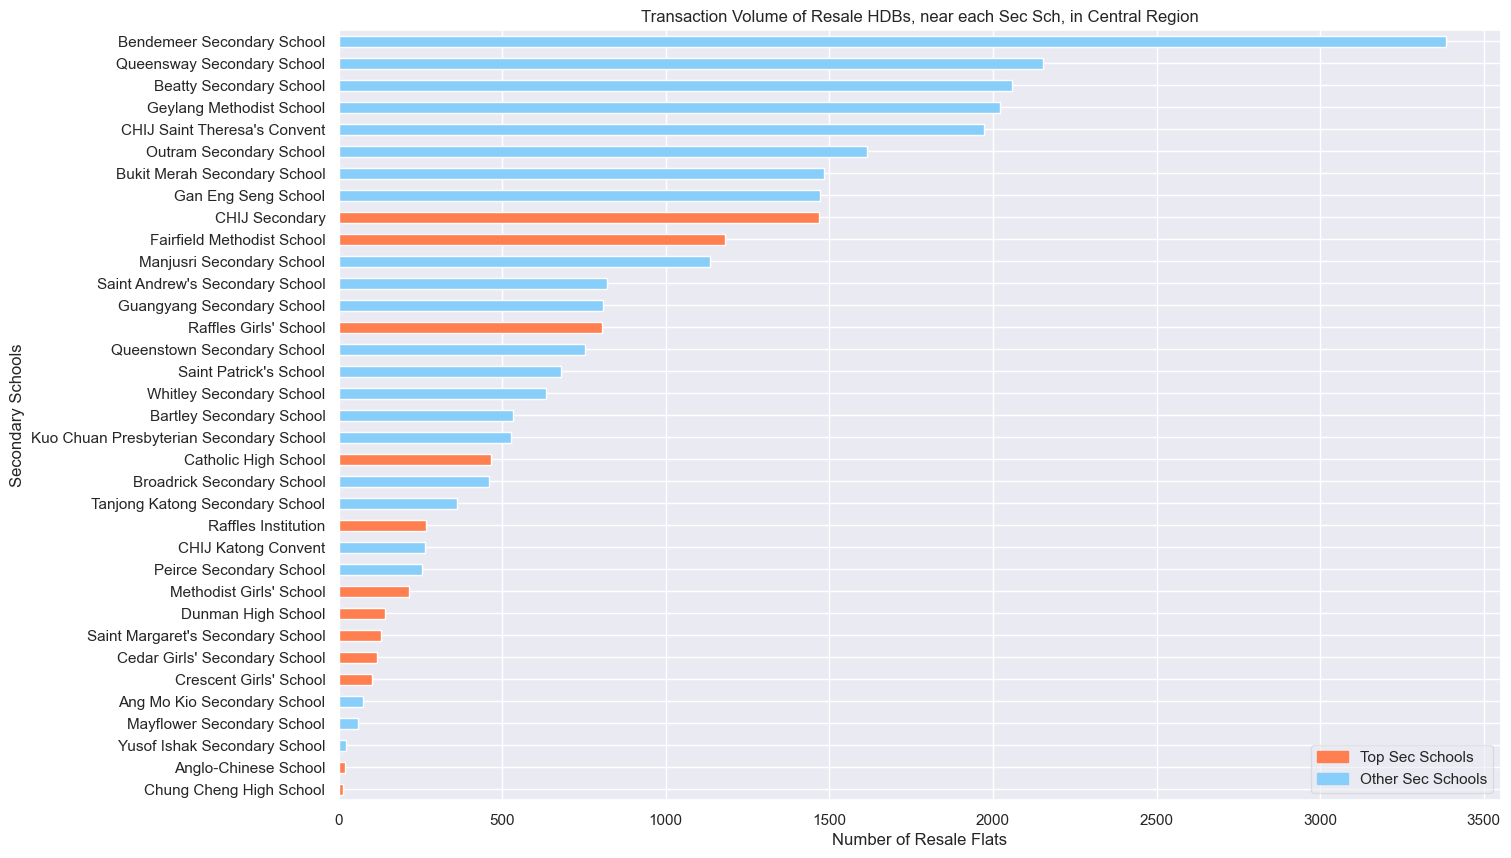

In [66]:
# Create a bar graph of the Transaction Volume of Resale HDB flats near Secondary Schools in Central Region
# list of top sec schs in central region
top_sec_schools_central = ["Raffles Girls' School", "Methodist Girls' School", "Raffles Institution", "Anglo-Chinese School", "Dunman High School",
"Cedar Girls' Secondary School", "Catholic High School", "CHIJ Secondary", "Chung Cheng High School", "Crescent Girls' School",
"Saint Margaret's Secondary School", "Fairfield Methodist School"]

# list of sec schs for colour customisation of bar plot
sec_sch_by_resale_vol_central = ['Chung Cheng High School', 'Anglo-Chinese School', 'Yusof Ishak Secondary School', 'Mayflower Secondary School', 'Ang Mo Kio Secondary School',
                                 "Crescent Girls' School", "Cedar Girls' Secondary School", "Saint Margaret's Secondary School", 'Dunman High School', "Methodist Girls' School",
                                 'Peirce Secondary School', 'CHIJ Katong Convent', 'Raffles Institution', 'Tanjong Katong Secondary School', 'Broadrick Secondary School',
                                 'Catholic High School', 'Kuo Chuan Presbyterian Secondary School', 'Bartley Secondary School', 'Whitley Secondary School', "Saint Patrick's School",
                                 'Queenstown Secondary School', "Raffles Girls' School", 'Guangyang Secondary School', "Saint Andrew's Secondary School", 'Manjusri Secondary School',
                                 'Fairfield Methodist School', 'CHIJ Secondary', 'Gan Eng Seng School', 'Bukit Merah Secondary School', 'Outram Secondary School', "CHIJ Saint Theresa's Convent",
                                 'Geylang Methodist School', 'Beatty Secondary School', 'Queensway Secondary School', 'Bendemeer Secondary School']

# custom colours for central vs. non-central
colors_3 = ["coral" if i in top_sec_schools_central else "lightskyblue" for i in sec_sch_by_resale_vol_central]

# bar plot sorted in ascending order (for horizontal bar plot)
ax5 = temp_df3.groupby('sec_sch_name')['id'].count().sort_values(ascending=True).plot(kind='barh', figsize=(15, 10), color=colors_3)
plt.title('Transaction Volume of Resale HDBs, near each Sec Sch, in Central Region')
ax5.set_ylabel("Secondary Schools")
ax5.set_xlabel("Number of Resale Flats")

# create a custom legend
cr_patch = mpatches.Patch(color='coral', label='Top Sec Schools')
ncr_patch = mpatches.Patch(color='lightskyblue', label='Other Sec Schools')
plt.legend(handles=[cr_patch, ncr_patch], loc='lower right', framealpha=0.5, frameon=True)

plt.show()


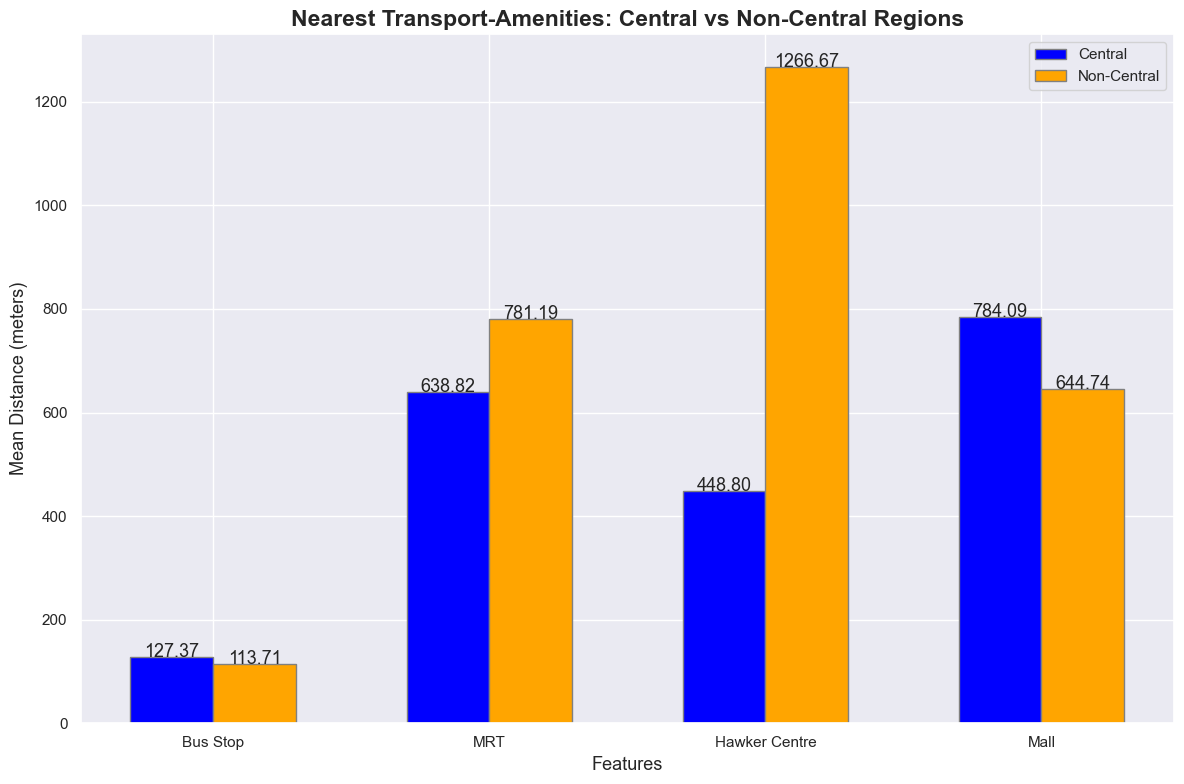

In [67]:
# Create a bar graph comparing the sought-after transport points and amenities to distance (Central vs. Non-Central)

central_region_towns = [
    'ORCHARD', 'SOMERSET', 'RIVER VALLEY', 'TANGLIN', 'BUKIT TIMAH', 'HOLLAND',
    'NEWTON', 'NOVENA', 'DUNEARN', 'WATTEN', 'BOAT QUAY', 'RAFFLES PLACE',
    'MARINA DOWNTOWN', 'SUNTEC CITY', 'SHENTON WAY', 'TANJONG PAGAR', 'SENTOSA',
    'CITY HALL', 'BUGIS', 'MARINA SOUTH', 'CHINATOWN', 'QUEENSTOWN', 'ALEXANDRA',
    'TIONG BAHRU', 'HARBOURFRONT', 'KEPPEL', 'TELOK BLANGAH', 'BUONA VISTA', 'DOVER',
    'PASIR PANJANG', 'FORT CANNING', 'ROCHOR', 'LITTLE INDIA', 'FARRER PARK',
    'BALESTIER', 'WHAMPOA', 'TOA PAYOH', 'BOON KENG', 'BENDEMEER', 'KAMPONG BUGIS',
    'POTONG PASIR', 'BIDADARI', 'MACPHERSON', 'UPPER ALJUNIED', 'GEYLANG', 'DAKOTA',
    'PAYA LEBAR CENTRAL', 'EUNOS', 'UBI', 'ALJUNIED', 'TANJONG RHU', 'AMBER',
    'MEYER', 'KATONG', 'DUNMAN', 'JOO CHIAT', 'MARINE PARADE', 'BISHAN', 'THOMSON'
]

# Filter the DataFrame into Central and Non-Central Region towns
central_df = train_clean[train_clean['town'].isin(central_region_towns)]
non_central_df = train_clean[~train_clean['town'].isin(central_region_towns)]

# Calculate the mean distances for each group
central_hawker_mean = central_df['hawker_nearest_distance'].mean()
central_mall_mean = central_df['mall_nearest_distance'].mean()
non_central_hawker_mean = non_central_df['hawker_nearest_distance'].mean()
non_central_mall_mean = non_central_df['mall_nearest_distance'].mean()
central_bus_mean = central_df['bus_stop_nearest_distance'].mean()
central_mrt_mean = central_df['mrt_nearest_distance'].mean()
non_central_bus_mean = non_central_df['bus_stop_nearest_distance'].mean()
non_central_mrt_mean = non_central_df['mrt_nearest_distance'].mean()

# Data for plotting - Assuming the mean calculations are already done as per your setup
categories = ['Bus Stop', 'MRT', 'Hawker Centre', 'Mall']
central_means = [central_bus_mean, central_mrt_mean, central_hawker_mean, central_mall_mean]
non_central_means = [non_central_bus_mean, non_central_mrt_mean, non_central_hawker_mean, non_central_mall_mean]

# Set the width of the bars
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(central_means))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.figure(figsize=(12, 8))
plt.bar(r1, central_means, color='blue', width=barWidth, edgecolor='grey', label='Central')
plt.bar(r2, non_central_means, color='orange', width=barWidth, edgecolor='grey', label='Non-Central')

# Add xticks on the middle of the group bars
plt.xlabel('Features', fontsize=13)
plt.xticks([r + barWidth/2 for r in range(len(central_means))], categories)
plt.ylabel('Mean Distance (meters)', fontsize=13)
plt.title('Nearest Transport-Amenities: Central vs Non-Central Regions', fontweight='bold', fontsize=16.5)

# Create legend & Show graphic
plt.legend()

# Annotating values on the bars for clarity
for i in range(len(central_means)):
    plt.text(r1[i], central_means[i], f'{central_means[i]:.2f}', ha='center', fontsize=13)
    plt.text(r2[i], non_central_means[i], f'{non_central_means[i]:.2f}', ha='center', fontsize=13)

plt.tight_layout()
plt.show()

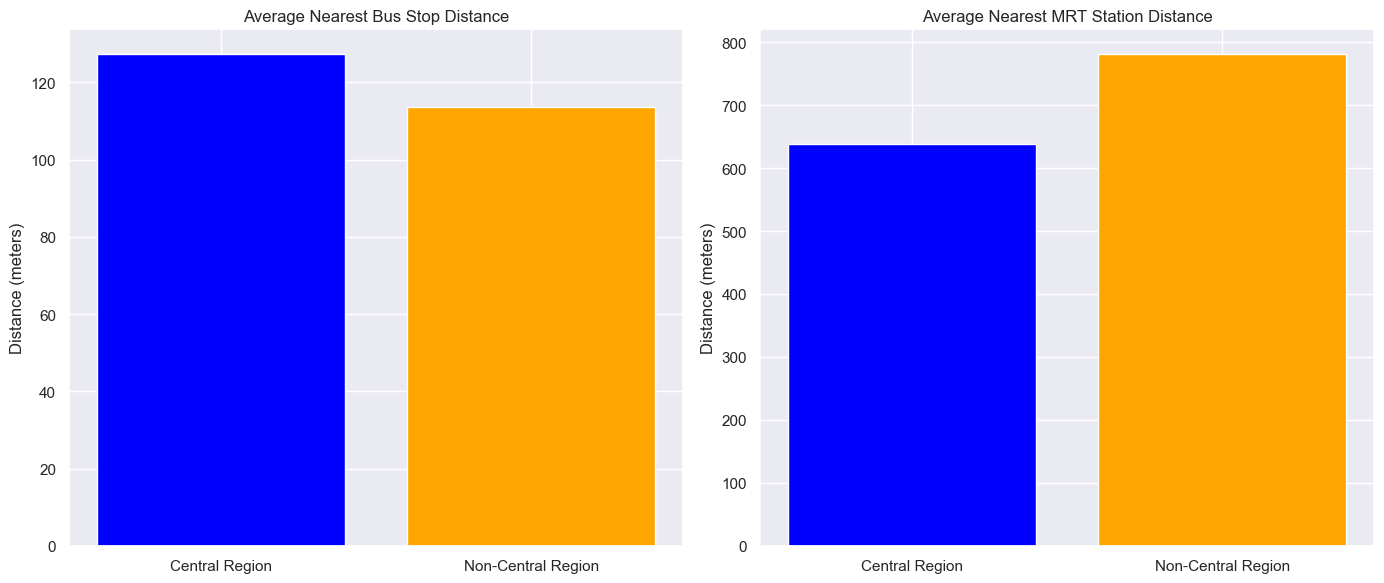

In [68]:
# Create a single bar chart comparing the average distance to the transport points - nearest MRT station/bus stop (Central vs. Non-Central regions)
central_region_towns = [
    'ORCHARD', 'SOMERSET', 'RIVER VALLEY', 'TANGLIN', 'BUKIT TIMAH', 'HOLLAND',
    'NEWTON', 'NOVENA', 'DUNEARN', 'WATTEN', 'BOAT QUAY', 'RAFFLES PLACE',
    'MARINA DOWNTOWN', 'SUNTEC CITY', 'SHENTON WAY', 'TANJONG PAGAR', 'SENTOSA',
    'CITY HALL', 'BUGIS', 'MARINA SOUTH', 'CHINATOWN', 'QUEENSTOWN', 'ALEXANDRA',
    'TIONG BAHRU', 'HARBOURFRONT', 'KEPPEL', 'TELOK BLANGAH', 'BUONA VISTA', 'DOVER',
    'PASIR PANJANG', 'FORT CANNING', 'ROCHOR', 'LITTLE INDIA', 'FARRER PARK',
    'BALESTIER', 'WHAMPOA', 'TOA PAYOH', 'BOON KENG', 'BENDEMEER', 'KAMPONG BUGIS',
    'POTONG PASIR', 'BIDADARI', 'MACPHERSON', 'UPPER ALJUNIED', 'GEYLANG', 'DAKOTA',
    'PAYA LEBAR CENTRAL', 'EUNOS', 'UBI', 'ALJUNIED', 'TANJONG RHU', 'AMBER',
    'MEYER', 'KATONG', 'DUNMAN', 'JOO CHIAT', 'MARINE PARADE', 'BISHAN', 'THOMSON'
]

# Filter the DataFrame into Central and Non-Central Region towns
central_df = train_clean[train_clean['town'].isin(central_region_towns)]
non_central_df = train_clean[~train_clean['town'].isin(central_region_towns)]

# Calculate the mean distances for each group
central_bus_mean = central_df['bus_stop_nearest_distance'].mean()
central_mrt_mean = central_df['mrt_nearest_distance'].mean()
non_central_bus_mean = non_central_df['bus_stop_nearest_distance'].mean()
non_central_mrt_mean = non_central_df['mrt_nearest_distance'].mean()

# Data for plotting
regions = ['Central Region', 'Non-Central Region']
bus_means = [central_bus_mean, non_central_bus_mean]
mrt_means = [central_mrt_mean, non_central_mrt_mean]

# Create the bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for 'bus_stop_nearest_distance'
axes[0].bar(regions, bus_means, color=['blue', 'orange'])
axes[0].set_title('Average Nearest Bus Stop Distance')
axes[0].set_ylabel('Distance (meters)')

# Plot for 'mrt_nearest_distance'
axes[1].bar(regions, mrt_means, color=['blue', 'orange'])
axes[1].set_title('Average Nearest MRT Station Distance')
axes[1].set_ylabel('Distance (meters)')

# Show the plots
plt.tight_layout()
plt.show()

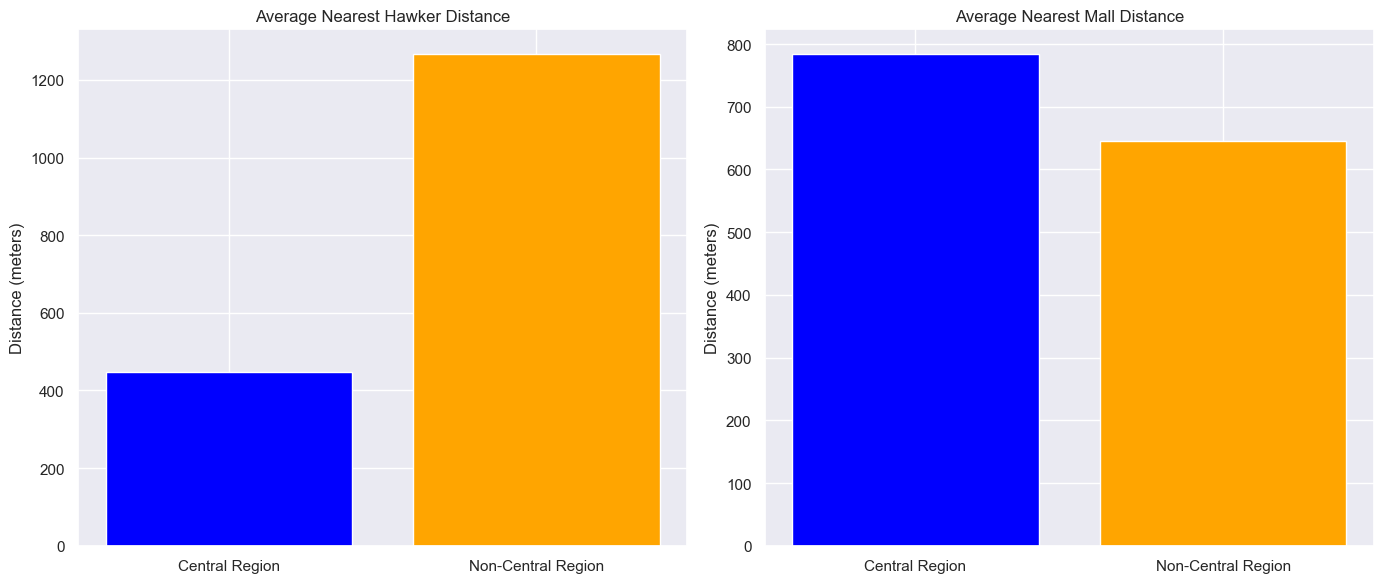

In [69]:
# Create a single bar chart comparing the average distance to the nearest amenities - Hawkers/Malls (Central vs. Non-Central regions)
central_region_towns = [
    'ORCHARD', 'SOMERSET', 'RIVER VALLEY', 'TANGLIN', 'BUKIT TIMAH', 'HOLLAND',
    'NEWTON', 'NOVENA', 'DUNEARN', 'WATTEN', 'BOAT QUAY', 'RAFFLES PLACE',
    'MARINA DOWNTOWN', 'SUNTEC CITY', 'SHENTON WAY', 'TANJONG PAGAR', 'SENTOSA',
    'CITY HALL', 'BUGIS', 'MARINA SOUTH', 'CHINATOWN', 'QUEENSTOWN', 'ALEXANDRA',
    'TIONG BAHRU', 'HARBOURFRONT', 'KEPPEL', 'TELOK BLANGAH', 'BUONA VISTA', 'DOVER',
    'PASIR PANJANG', 'FORT CANNING', 'ROCHOR', 'LITTLE INDIA', 'FARRER PARK',
    'BALESTIER', 'WHAMPOA', 'TOA PAYOH', 'BOON KENG', 'BENDEMEER', 'KAMPONG BUGIS',
    'POTONG PASIR', 'BIDADARI', 'MACPHERSON', 'UPPER ALJUNIED', 'GEYLANG', 'DAKOTA',
    'PAYA LEBAR CENTRAL', 'EUNOS', 'UBI', 'ALJUNIED', 'TANJONG RHU', 'AMBER',
    'MEYER', 'KATONG', 'DUNMAN', 'JOO CHIAT', 'MARINE PARADE', 'BISHAN', 'THOMSON'
]

# Filter the DataFrame into Central and Non-Central Region towns
central_df = train_clean[train_clean['town'].isin(central_region_towns)]
non_central_df = train_clean[~train_clean['town'].isin(central_region_towns)]

# Calculate the mean distances for each group
central_hawker_mean = central_df['hawker_nearest_distance'].mean()
central_mall_mean = central_df['mall_nearest_distance'].mean()
non_central_hawker_mean = non_central_df['hawker_nearest_distance'].mean()
non_central_mall_mean = non_central_df['mall_nearest_distance'].mean()

# Data for plotting
regions = ['Central Region', 'Non-Central Region']
hawker_means = [central_hawker_mean, non_central_hawker_mean]
mall_means = [central_mall_mean, non_central_mall_mean]

# Create the bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for 'hawker_nearest_distance'
axes[0].bar(regions, hawker_means, color=['blue', 'orange'])
axes[0].set_title('Average Nearest Hawker Distance')
axes[0].set_ylabel('Distance (meters)')

# Plot for 'mall_nearest_distance'
axes[1].bar(regions, mall_means, color=['blue', 'orange'])
axes[1].set_title('Average Nearest Mall Distance')
axes[1].set_ylabel('Distance (meters)')

# Show the plots
plt.tight_layout()
plt.show()

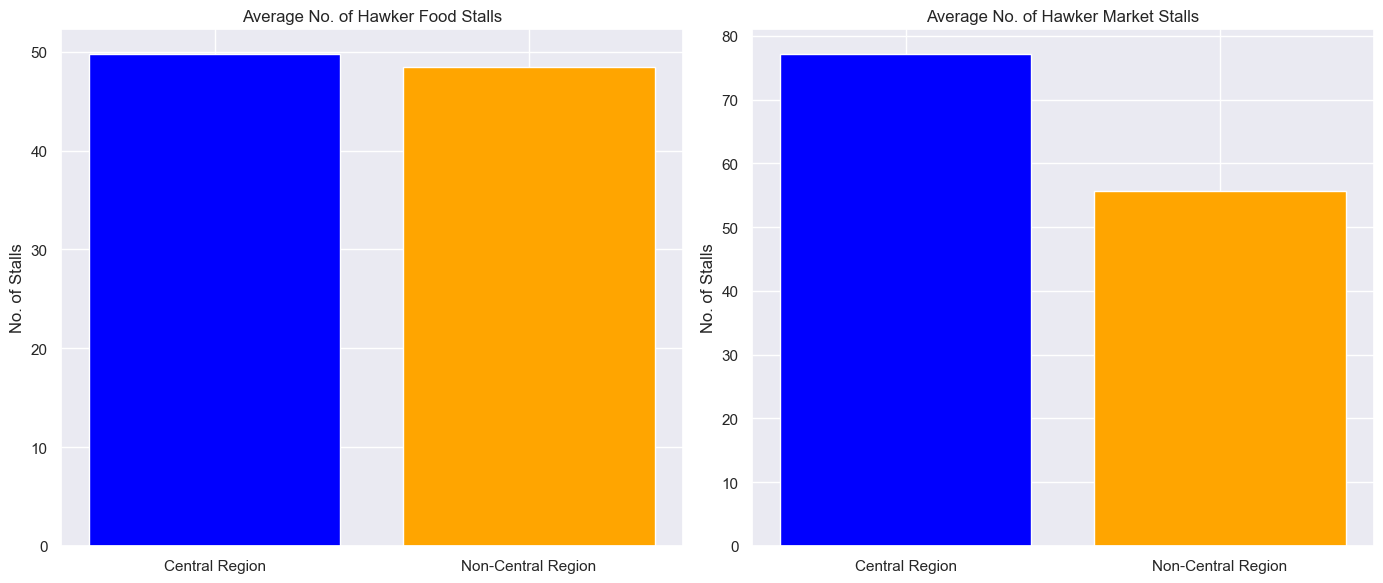

In [70]:
# Create a single bar chart comparing the average no. of Hawker Market vs. Hawker Food stalls (Central vs. Non-Central regions)
# [rationale: something that people might regard as a deciding factor too]
central_region_towns = [
    'ORCHARD', 'SOMERSET', 'RIVER VALLEY', 'TANGLIN', 'BUKIT TIMAH', 'HOLLAND',
    'NEWTON', 'NOVENA', 'DUNEARN', 'WATTEN', 'BOAT QUAY', 'RAFFLES PLACE',
    'MARINA DOWNTOWN', 'SUNTEC CITY', 'SHENTON WAY', 'TANJONG PAGAR', 'SENTOSA',
    'CITY HALL', 'BUGIS', 'MARINA SOUTH', 'CHINATOWN', 'QUEENSTOWN', 'ALEXANDRA',
    'TIONG BAHRU', 'HARBOURFRONT', 'KEPPEL', 'TELOK BLANGAH', 'BUONA VISTA', 'DOVER',
    'PASIR PANJANG', 'FORT CANNING', 'ROCHOR', 'LITTLE INDIA', 'FARRER PARK',
    'BALESTIER', 'WHAMPOA', 'TOA PAYOH', 'BOON KENG', 'BENDEMEER', 'KAMPONG BUGIS',
    'POTONG PASIR', 'BIDADARI', 'MACPHERSON', 'UPPER ALJUNIED', 'GEYLANG', 'DAKOTA',
    'PAYA LEBAR CENTRAL', 'EUNOS', 'UBI', 'ALJUNIED', 'TANJONG RHU', 'AMBER',
    'MEYER', 'KATONG', 'DUNMAN', 'JOO CHIAT', 'MARINE PARADE', 'BISHAN', 'THOMSON'
]

# Filter the DataFrame into Central and Non-Central Region towns
central_df = train_clean[train_clean['town'].isin(central_region_towns)]
non_central_df = train_clean[~train_clean['town'].isin(central_region_towns)]

# Calculate the mean distances for each group
central_hawker_food_mean = central_df['hawker_food_stalls'].mean()
central_hawker_market_mean = central_df['hawker_market_stalls'].mean()
non_central_hawker_food_mean = non_central_df['hawker_food_stalls'].mean()
non_central_hawker_market_mean = non_central_df['hawker_market_stalls'].mean()

# Data for plotting
regions = ['Central Region', 'Non-Central Region']
hawker_food_means = [central_hawker_food_mean, non_central_hawker_food_mean]
hawker_market_means = [central_hawker_market_mean, non_central_hawker_market_mean]

# Create the bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for 'hawker_food_stalls'
axes[0].bar(regions, hawker_food_means, color=['blue', 'orange'])
axes[0].set_title('Average No. of Hawker Food Stalls')
axes[0].set_ylabel('No. of Stalls')

# Plot for 'hawker_market_stalls'
axes[1].bar(regions, hawker_market_means, color=['blue', 'orange'])
axes[1].set_title('Average No. of Hawker Market Stalls')
axes[1].set_ylabel('No. of Stalls')

# Show the plots
plt.tight_layout()
plt.show()

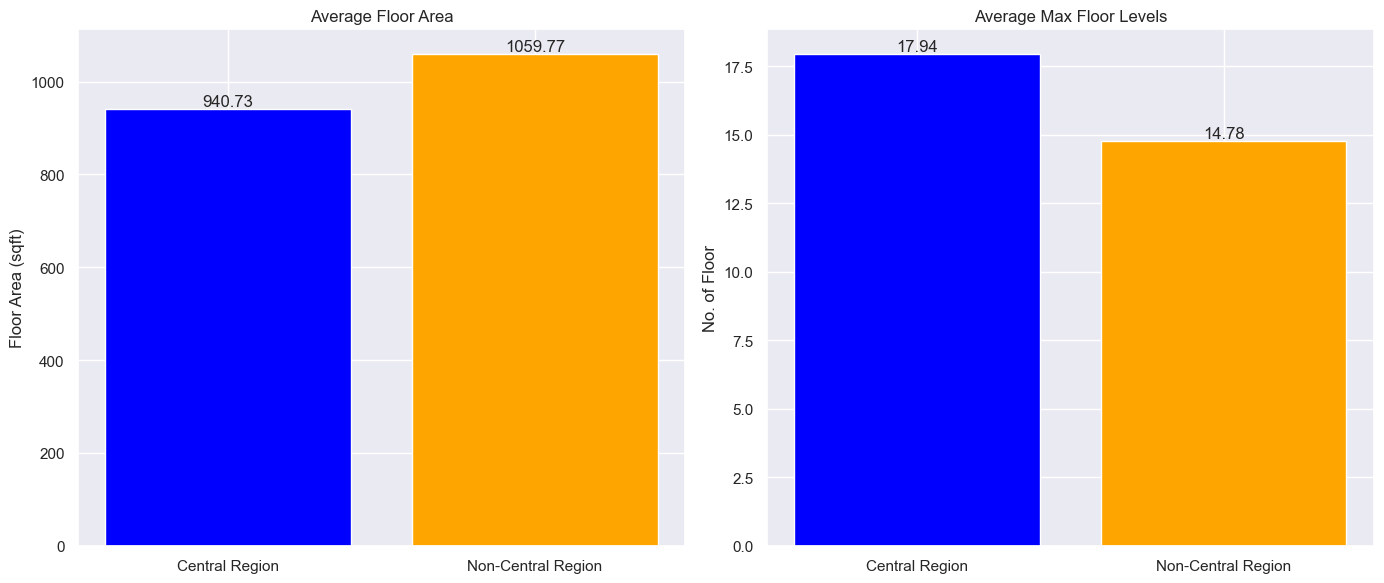

In [71]:
# Create a single bar chart comparing the average floor areas AND average floor levels (Central vs. Non-Central regions) - these 2 have high correlation to resale_price
central_region_towns = [
    'ORCHARD', 'SOMERSET', 'RIVER VALLEY', 'TANGLIN', 'BUKIT TIMAH', 'HOLLAND',
    'NEWTON', 'NOVENA', 'DUNEARN', 'WATTEN', 'BOAT QUAY', 'RAFFLES PLACE',
    'MARINA DOWNTOWN', 'SUNTEC CITY', 'SHENTON WAY', 'TANJONG PAGAR', 'SENTOSA',
    'CITY HALL', 'BUGIS', 'MARINA SOUTH', 'CHINATOWN', 'QUEENSTOWN', 'ALEXANDRA',
    'TIONG BAHRU', 'HARBOURFRONT', 'KEPPEL', 'TELOK BLANGAH', 'BUONA VISTA', 'DOVER',
    'PASIR PANJANG', 'FORT CANNING', 'ROCHOR', 'LITTLE INDIA', 'FARRER PARK',
    'BALESTIER', 'WHAMPOA', 'TOA PAYOH', 'BOON KENG', 'BENDEMEER', 'KAMPONG BUGIS',
    'POTONG PASIR', 'BIDADARI', 'MACPHERSON', 'UPPER ALJUNIED', 'GEYLANG', 'DAKOTA',
    'PAYA LEBAR CENTRAL', 'EUNOS', 'UBI', 'ALJUNIED', 'TANJONG RHU', 'AMBER',
    'MEYER', 'KATONG', 'DUNMAN', 'JOO CHIAT', 'MARINE PARADE', 'BISHAN', 'THOMSON'
]

# Filter the DataFrame into Central and Non-Central Region towns
central_df = train_clean[train_clean['town'].isin(central_region_towns)]
non_central_df = train_clean[~train_clean['town'].isin(central_region_towns)]

# Calculate the mean distances for each group
central_floor_area_mean = central_df['floor_area_sqft'].mean()
central_max_floor_lvl_mean = central_df['max_floor_lvl'].mean()
non_central_floor_area_mean = non_central_df['floor_area_sqft'].mean()
non_central_max_floor_lvl_mean = non_central_df['max_floor_lvl'].mean()

# Data for plotting
regions = ['Central Region', 'Non-Central Region']
floor_area_means = [central_floor_area_mean, non_central_floor_area_mean]
max_floor_lvl_means = [central_max_floor_lvl_mean, non_central_max_floor_lvl_mean]

# Create the bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for 'floor_area_meams'
bars1 = axes[0].bar(regions, floor_area_means, color=['blue', 'orange'])
axes[0].set_title('Average Floor Area')
axes[0].set_ylabel('Floor Area (sqft)')

# Add value labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
                 ha='center', va='bottom')

# Plot for 'max_floor_lvl_means'
bars2 = axes[1].bar(regions, max_floor_lvl_means, color=['blue', 'orange'])
axes[1].set_title('Average Max Floor Levels')
axes[1].set_ylabel('No. of Floor')

# Add value labels on top of the bars
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
                 ha='center', va='bottom')

# Show the plots
plt.tight_layout()
plt.show()

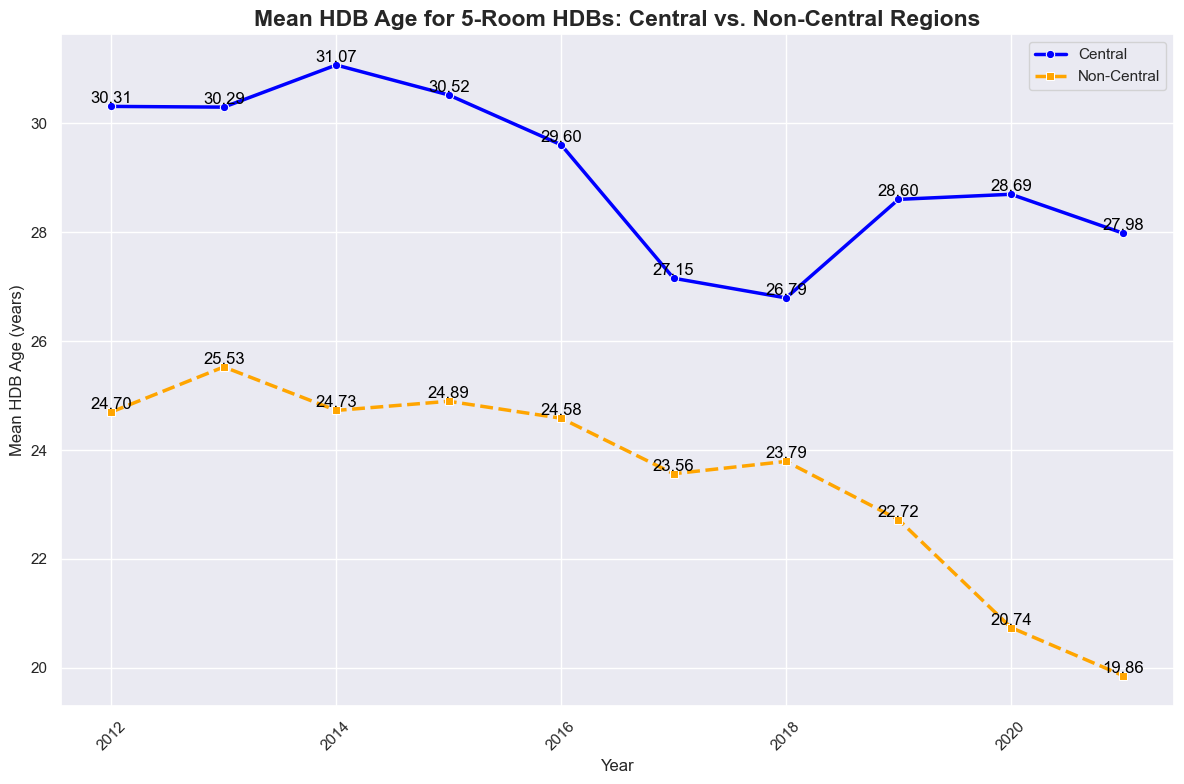

In [72]:
# Create line plot to calculate Mean HDB Age for 5 room HDB flats over the years (Central vs. Non-Central regions)
# [rationale: HDB age has high correlation to resale_price too]
# Filter for 5-room HDBs
five_room_df = train_clean[train_clean['flat_type'] == '5 ROOM']

# Group by Region, Year, and calculate mean 'hdb_age'
mean_hdb_age = five_room_df.groupby(['Region', 'tranc_year'])['hdb_age'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Separate the data for Central and Non-Central regions
central_data = mean_hdb_age[mean_hdb_age['Region'] == 'Central']
non_central_data = mean_hdb_age[mean_hdb_age['Region'] == 'Non-Central']

# Plot Central region - blue circle for each plot point, thick line
sns.lineplot(data=central_data, x='tranc_year', y='hdb_age', 
             marker='o', color='blue', linewidth=2.5, label='Central')

# Plot Non-Central region - orange square for each plot point, thick dotted line
sns.lineplot(data=non_central_data, x='tranc_year', y='hdb_age', 
             marker='s', color='orange', linewidth=2.5, linestyle='--', label='Non-Central')

# Adding plot title and labels
plt.title('Mean HDB Age for 5-Room HDBs: Central vs. Non-Central Regions', fontsize=16.5, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Mean HDB Age (years)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding value labels at each point for both Central and Non-Central
for i in range(central_data.shape[0]):
    plt.text(x=central_data['tranc_year'].iloc[i], y=central_data['hdb_age'].iloc[i],
             s=f"{central_data['hdb_age'].iloc[i]:.2f}", 
             color='black', ha='center', va='bottom')

for i in range(non_central_data.shape[0]):
    plt.text(x=non_central_data['tranc_year'].iloc[i], y=non_central_data['hdb_age'].iloc[i],
             s=f"{non_central_data['hdb_age'].iloc[i]:.2f}", 
             color='black', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

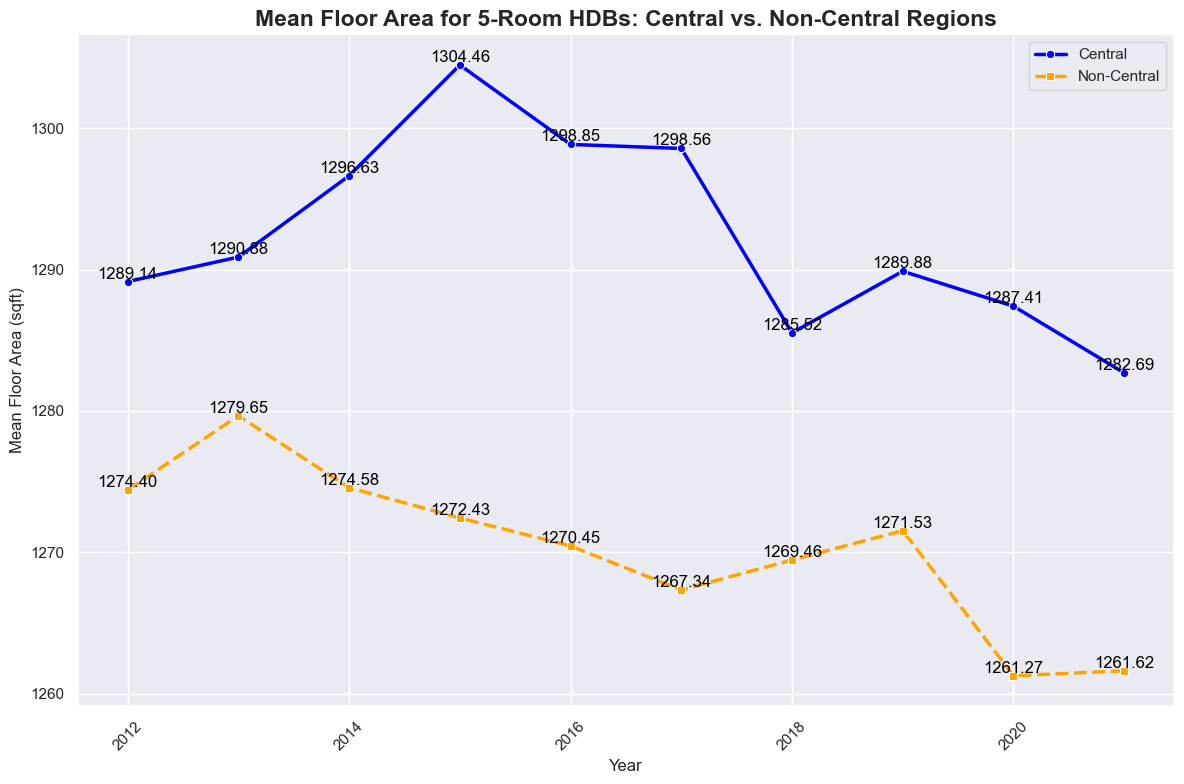

In [73]:
# Create line plot to calculate Mean Floor Area for 5 room HDB flats over the years (Central vs. Non-Central regions)
# [rationale: Floor Area has high correlation to resale_price too]
# Filter for 5-room HDBs
five_room_df = train_clean[train_clean['flat_type'] == '5 ROOM']

# Group by Region, Year, and calculate mean 'floor_area_sqft'
mean_hdb_age = five_room_df.groupby(['Region', 'tranc_year'])['floor_area_sqft'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Separate the data for Central and Non-Central regions
central_data = mean_hdb_age[mean_hdb_age['Region'] == 'Central']
non_central_data = mean_hdb_age[mean_hdb_age['Region'] == 'Non-Central']

# Plot Central region - blue circle for each plot point, thick line
sns.lineplot(data=central_data, x='tranc_year', y='floor_area_sqft', 
             marker='o', color='blue', linewidth=2.5, label='Central')

# Plot Non-Central region - orange square for each plot point, thick dotted line
sns.lineplot(data=non_central_data, x='tranc_year', y='floor_area_sqft', 
             marker='s', color='orange', linewidth=2.5, linestyle='--', label='Non-Central')

# Adding plot title and labels
plt.title('Mean Floor Area for 5-Room HDBs: Central vs. Non-Central Regions', fontsize=16.5, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Mean Floor Area (sqft)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding value labels at each point for both Central and Non-Central
for i in range(central_data.shape[0]):
    plt.text(x=central_data['tranc_year'].iloc[i], y=central_data['floor_area_sqft'].iloc[i],
             s=f"{central_data['floor_area_sqft'].iloc[i]:.2f}", 
             color='black', ha='center', va='bottom')

for i in range(non_central_data.shape[0]):
    plt.text(x=non_central_data['tranc_year'].iloc[i], y=non_central_data['floor_area_sqft'].iloc[i],
             s=f"{non_central_data['floor_area_sqft'].iloc[i]:.2f}", 
             color='black', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()



In [74]:
central_region_towns = [
    'ORCHARD', 'SOMERSET', 'RIVER VALLEY', 'TANGLIN', 'BUKIT TIMAH', 'HOLLAND',
    'NEWTON', 'NOVENA', 'DUNEARN', 'WATTEN', 'BOAT QUAY', 'RAFFLES PLACE',
    'MARINA DOWNTOWN', 'SUNTEC CITY', 'SHENTON WAY', 'TANJONG PAGAR', 'SENTOSA',
    'CITY HALL', 'BUGIS', 'MARINA SOUTH', 'CHINATOWN', 'QUEENSTOWN', 'ALEXANDRA',
    'TIONG BAHRU', 'HARBOURFRONT', 'KEPPEL', 'TELOK BLANGAH', 'BUONA VISTA', 'DOVER',
    'PASIR PANJANG', 'FORT CANNING', 'ROCHOR', 'LITTLE INDIA', 'FARRER PARK',
    'BALESTIER', 'WHAMPOA', 'TOA PAYOH', 'BOON KENG', 'BENDEMEER', 'KAMPONG BUGIS',
    'POTONG PASIR', 'BIDADARI', 'MACPHERSON', 'UPPER ALJUNIED', 'GEYLANG', 'DAKOTA',
    'PAYA LEBAR CENTRAL', 'EUNOS', 'UBI', 'ALJUNIED', 'TANJONG RHU', 'AMBER',
    'MEYER', 'KATONG', 'DUNMAN', 'JOO CHIAT', 'MARINE PARADE', 'BISHAN', 'THOMSON'
]

# Mark each row as 'Central' or 'Non-Central'
train_clean['Region'] = train_clean['town'].apply(lambda x: 'Central' if x.upper() in [town.upper() for town in central_region_towns] else 'Non-Central')

# Calculate the mean resale price for each region (Central vs. Non-Central)
mean_resale_price = train_clean.groupby('Region')['resale_price'].mean()

print(mean_resale_price)

Region
Central        514939.623453
Non-Central    440725.351479
Name: resale_price, dtype: float64


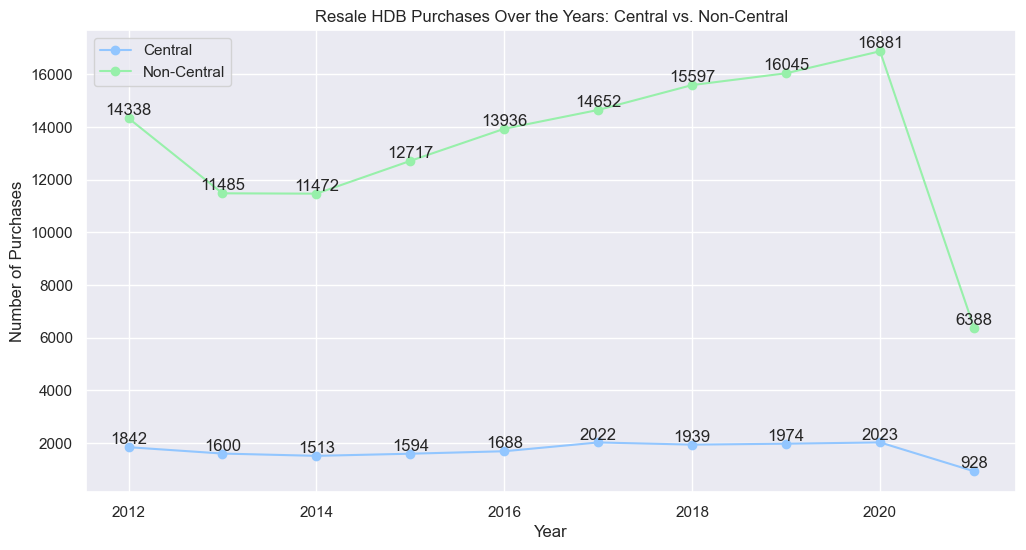

In [75]:
# Create line plot to calculate Transaction/Purchase of Resale HDBs over the years (Central vs. Non-Central regions)
# [observation: COVID saw the dip in resale prices of HDBs, even more so in the Central region with >50% decrease]
# Define Central and Non-Central towns
central_region_towns = [
    'ORCHARD', 'SOMERSET', 'RIVER VALLEY', 'TANGLIN', 'BUKIT TIMAH', 'HOLLAND',
    'NEWTON', 'NOVENA', 'DUNEARN', 'WATTEN', 'BOAT QUAY', 'RAFFLES PLACE',
    'MARINA DOWNTOWN', 'SUNTEC CITY', 'SHENTON WAY', 'TANJONG PAGAR', 'SENTOSA',
    'CITY HALL', 'BUGIS', 'MARINA SOUTH', 'CHINATOWN', 'QUEENSTOWN', 'ALEXANDRA',
    'TIONG BAHRU', 'HARBOURFRONT', 'KEPPEL', 'TELOK BLANGAH', 'BUONA VISTA', 'DOVER',
    'PASIR PANJANG', 'FORT CANNING', 'ROCHOR', 'LITTLE INDIA', 'FARRER PARK',
    'BALESTIER', 'WHAMPOA', 'TOA PAYOH', 'BOON KENG', 'BENDEMEER', 'KAMPONG BUGIS',
    'POTONG PASIR', 'BIDADARI', 'MACPHERSON', 'UPPER ALJUNIED', 'GEYLANG', 'DAKOTA',
    'PAYA LEBAR CENTRAL', 'EUNOS', 'UBI', 'ALJUNIED', 'TANJONG RHU', 'AMBER',
    'MEYER', 'KATONG', 'DUNMAN', 'JOO CHIAT', 'MARINE PARADE', 'BISHAN', 'THOMSON'
]

# Convert town names to uppercase for consistent matching
train_clean['town'] = train_clean['town'].str.upper()

# Classify each entry as Central or Non-Central
train_clean['region'] = train_clean['town'].apply(lambda x: 'Central' if x in central_region_towns else 'Non-Central')

# Group by year and region, then count the number of entries (purchases)
yearly_purchases = train_clean.groupby(['tranc_year', 'region']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
for region in yearly_purchases.columns:
    plt.plot(yearly_purchases.index, yearly_purchases[region], marker='o', label=region)
    for year, value in yearly_purchases[region].items():
        plt.text(year, value, value, ha='center', va='bottom')
    
plt.title('Resale HDB Purchases Over the Years: Central vs. Non-Central')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.legend()
plt.grid(True)
plt.show()

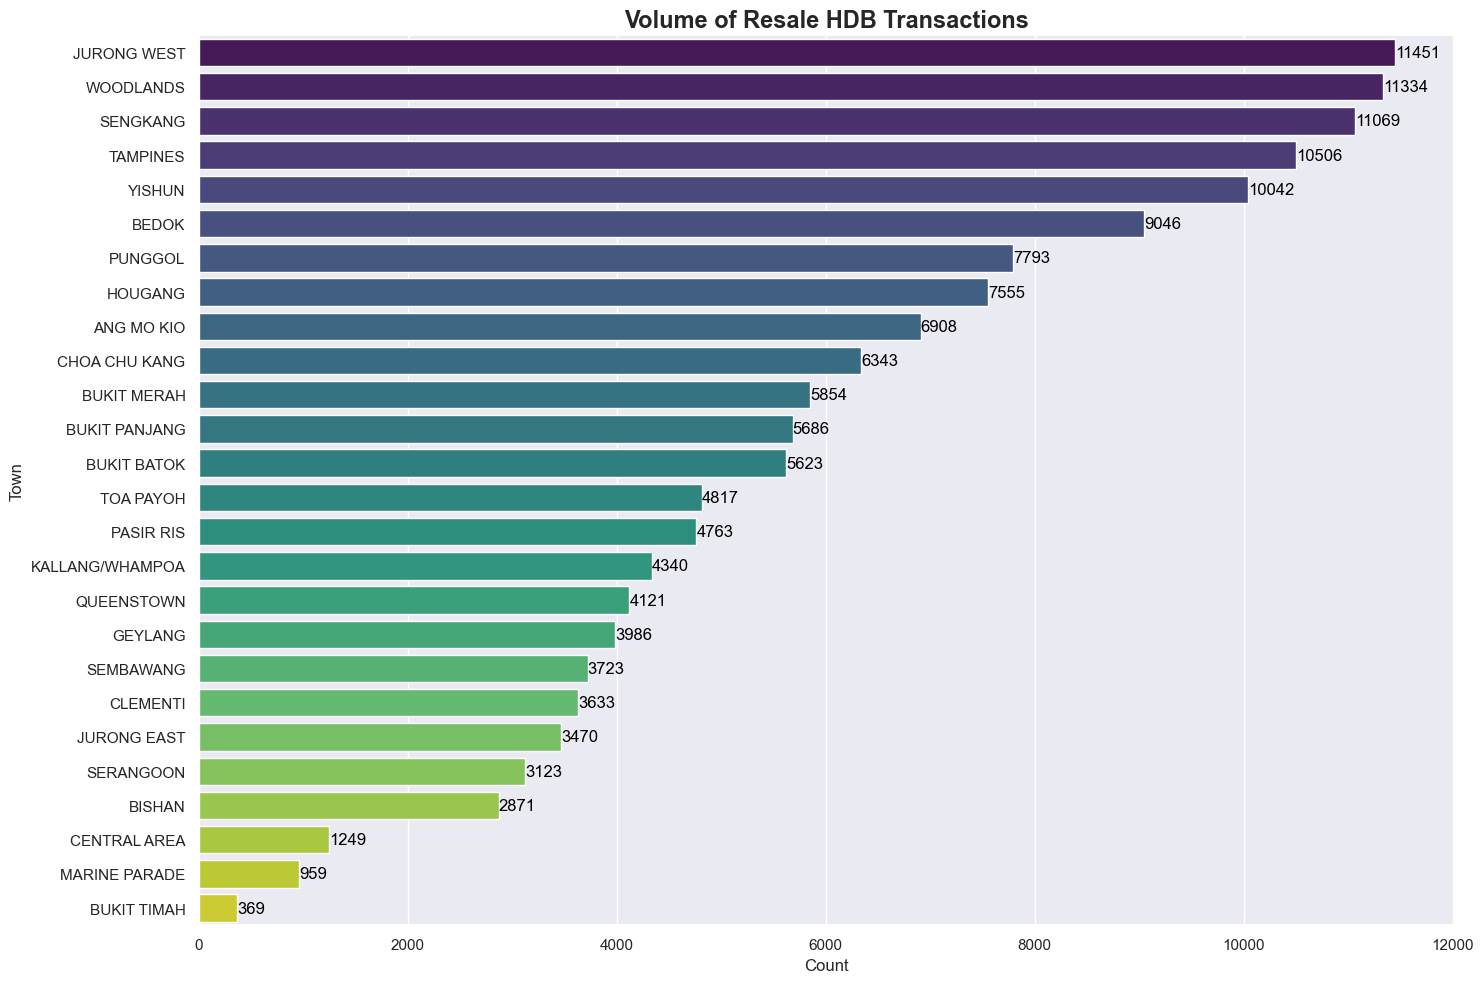

In [76]:
# Create bar graph to count the Volume of Resale HDB transactions/purchases in each town (ALL)
# Count the frequency of each town
town_counts = train_clean['town'].value_counts().reset_index()
town_counts.columns = ['town', 'count']

# Plotting the frequency of each town as a bar chart
plt.figure(figsize=(15, 10))  # You might need to adjust the figure size based on the number of unique towns
barplot = sns.barplot(data=town_counts, x='count', y='town', palette='viridis')

# Add titles and labels
plt.title('Volume of Resale HDB Transactions', fontsize=17, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Town')

# Adding value labels
for index, value in enumerate(town_counts['count']):
    plt.text(value, index, str(value), color='black', ha="left", va='center')

plt.tight_layout()  # Ensure the plot fits into the figure area nicely
plt.show()

Text(0, 0.5, 'Town')

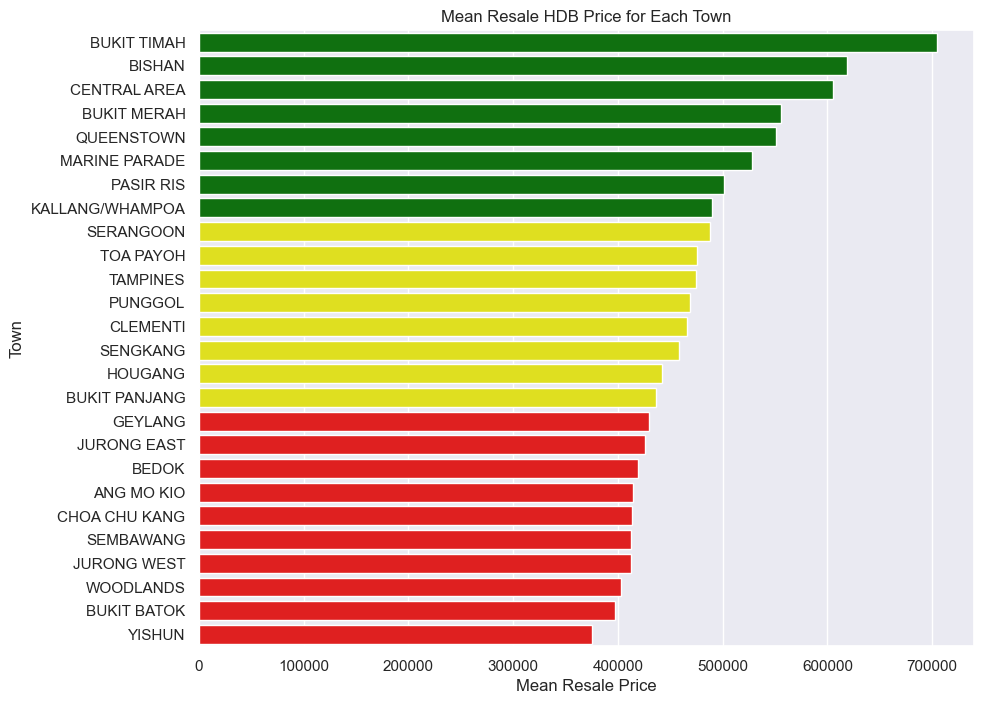

In [77]:
# Create bar graph to count the Mean Resale HDB Price in each town (ALL)
# Calculate the mean resale price for each town
mean_resale_prices = train_clean.groupby('town')['resale_price'].mean().reset_index()

# Sort the towns by mean resale price for better visualization
mean_resale_prices = mean_resale_prices.sort_values('resale_price', ascending=False)

# Tier the Mean Resale with Colour Scheme (i.e. top 33% is green, middle 33% is amber/yellow, bottom 34% is red)
# Get the total number of towns
num_towns = mean_resale_prices.shape[0] 
# Top third for green
green_num = int(num_towns * 0.33)  
# Middle third for yellow
yellow_num = int(num_towns * 0.33)  
# Bottom third for red
red_num = num_towns - green_num - yellow_num  

# Define the color list
colors = ['green'] * green_num + ['yellow'] * yellow_num + ['red'] * red_num

# Plotting using seaborn with the custom colors
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
barplot = sns.barplot(data=mean_resale_prices, x='resale_price', y='town', palette=colors)

# Add titles and labels
plt.title('Mean Resale HDB Price for Each Town')
plt.xlabel('Mean Resale Price')
plt.ylabel('Town')

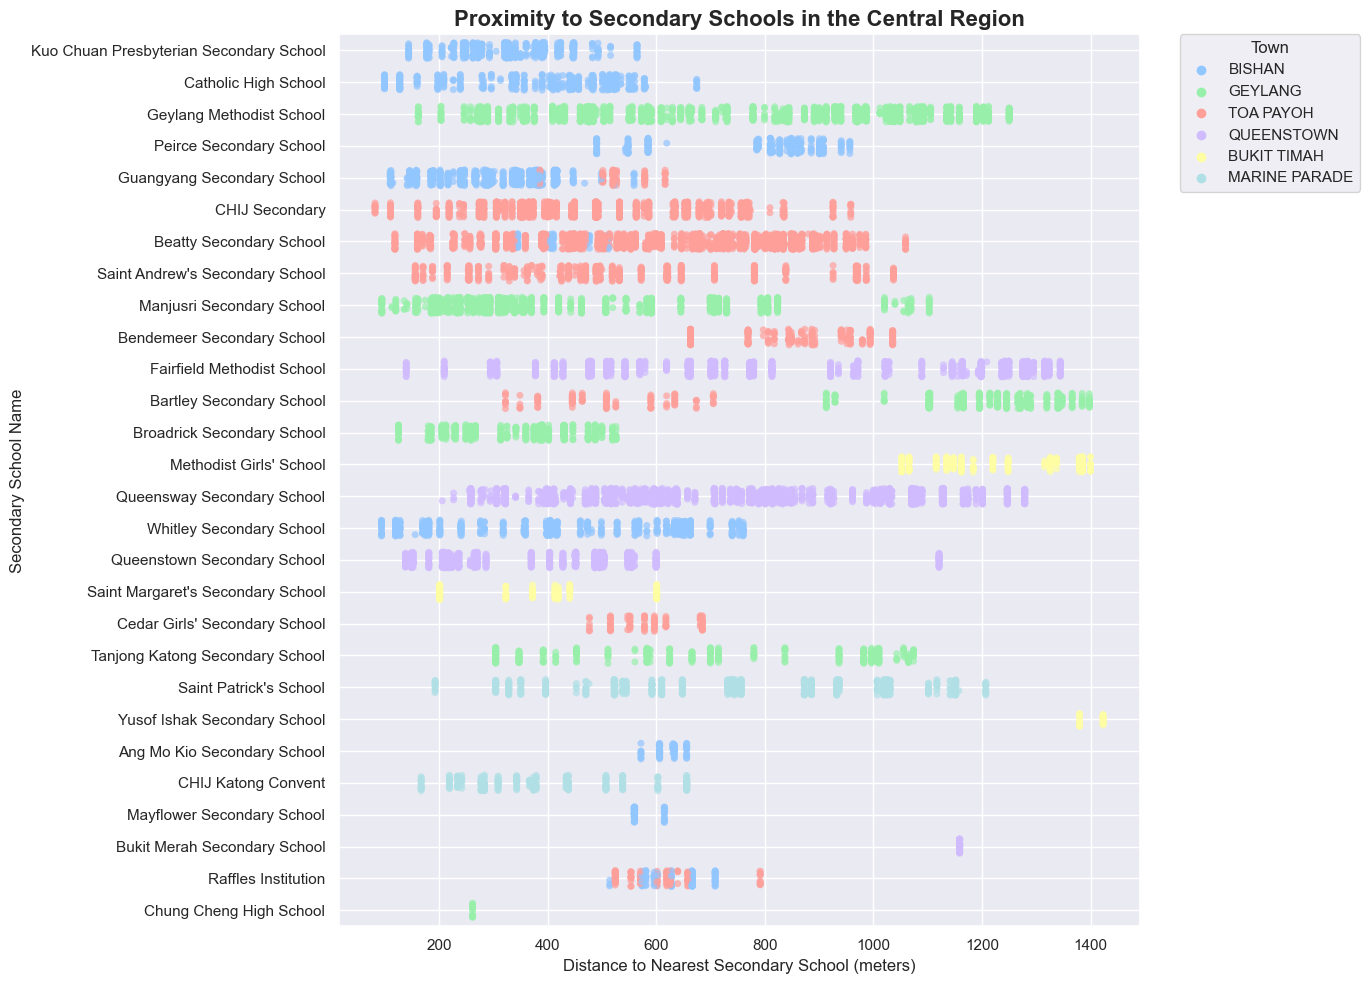

In [78]:
# Create scatter plot of the Proximity to Secondary Schools (Central Region only)
# List of towns in the Central Region 
central_region_towns = [
    'ORCHARD', 'SOMERSET', 'RIVER VALLEY', 'TANGLIN', 'BUKIT TIMAH', 'HOLLAND',
    'NEWTON', 'NOVENA', 'DUNEARN', 'WATTEN', 'BOAT QUAY', 'RAFFLES PLACE', 
    'MARINA DOWNTOWN', 'SUNTEC CITY', 'SHENTON WAY', 'TANJONG PAGAR', 'SENTOSA', 
    'CITY HALL', 'BUGIS', 'MARINA SOUTH', 'CHINATOWN', 'QUEENSTOWN', 'ALEXANDRA', 
    'TIONG BAHRU', 'HARBOURFRONT', 'KEPPEL', 'TELOK BLANGAH', 'BUONA VISTA', 'DOVER', 
    'PASIR PANJANG', 'FORT CANNING', 'ROCHOR', 'LITTLE INDIA', 'FARRER PARK', 
    'BALESTIER', 'WHAMPOA', 'TOA PAYOH', 'BOON KENG', 'BENDEMEER', 'KAMPONG BUGIS', 
    'POTONG PASIR', 'BIDADARI', 'MACPHERSON', 'UPPER ALJUNIED', 'GEYLANG', 'DAKOTA', 
    'PAYA LEBAR CENTRAL', 'EUNOS', 'UBI', 'ALJUNIED', 'TANJONG RHU', 'AMBER', 
    'MEYER', 'KATONG', 'DUNMAN', 'JOO CHIAT', 'MARINE PARADE', 'BISHAN', 'THOMSON'
]

# Filter out the transactions in the Central Region
central_region_df = train_clean[train_clean['town'].isin(central_region_towns)]

plt.figure(figsize=(14, 10))  # Increase figure size for better visibility
sns.stripplot(data=central_region_df, y='sec_sch_name', x='sec_sch_nearest_dist', hue='town',
              size=5,  # Make dots larger
              jitter=0.25,  # Add jitter to spread the dots out
              alpha=0.7)  # Make dots slightly transparent

plt.title('Proximity to Secondary Schools in the Central Region', fontsize=16, fontweight='bold')
plt.xlabel('Distance to Nearest Secondary School (meters)', fontsize=12)
plt.ylabel('Secondary School Name', fontsize=12)
plt.legend(title='Town', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Move the legend out of the plot

plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

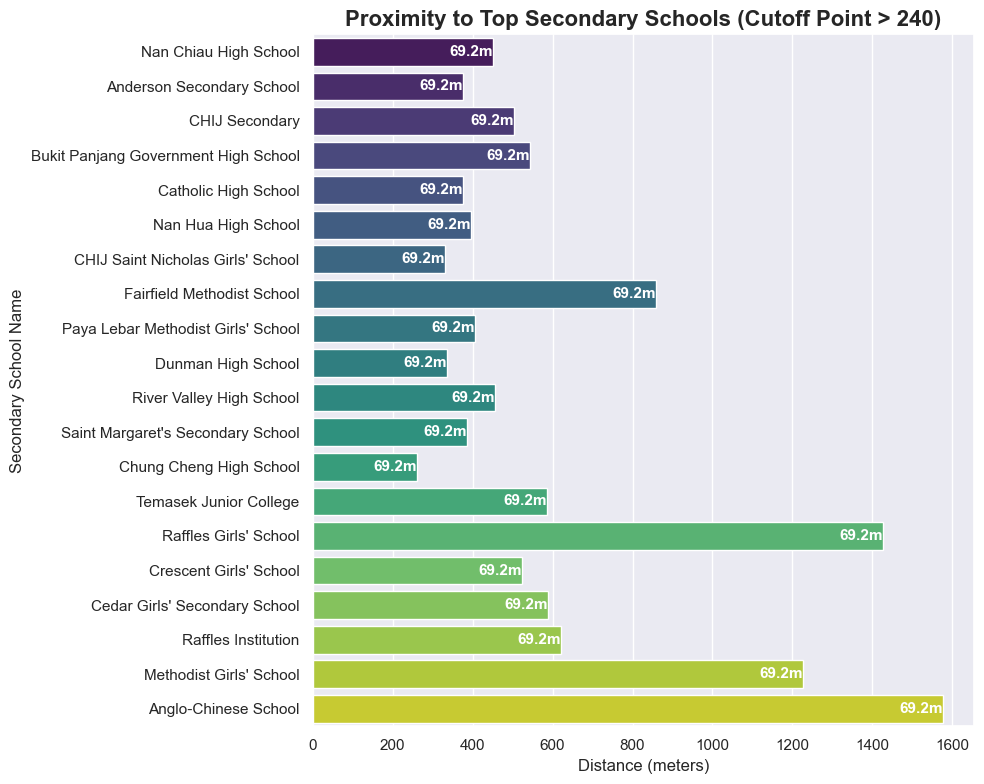

In [79]:
# Create bar graph of the Average Proximity to Top Secondary Schools (Central Region only)
# [rationale: better visualisation than scatter plot]
# Filter schools with a cutoff_point > 240
filtered_schools = train_clean[train_clean['cutoff_point'] > 240]

# Sorting the filtered DataFrame by 'sec_sch_nearest_dist'
filtered_schools_sorted = filtered_schools.sort_values('sec_sch_nearest_dist')

# Create the bar plot
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(data=filtered_schools_sorted, y='sec_sch_name', x='sec_sch_nearest_dist', ci=None, palette='viridis')

# Set title and labels with increased font size and weight
plt.title('Proximity to Top Secondary Schools (Cutoff Point > 240)', fontsize=16, fontweight='bold')
plt.xlabel('Distance (meters)')
plt.ylabel('Secondary School Name')

# Annotate bars with the count and distance
for bar, distance in zip(bar_plot.patches, filtered_schools_sorted['sec_sch_nearest_dist']):
    plt.text(bar.get_x() + bar.get_width() - 0.2, bar.get_y() + bar.get_height()/2, f'{distance:.1f}m', 
             ha='right', va='center', fontsize=11, color='white', fontweight='bold')


plt.tight_layout()
plt.show()

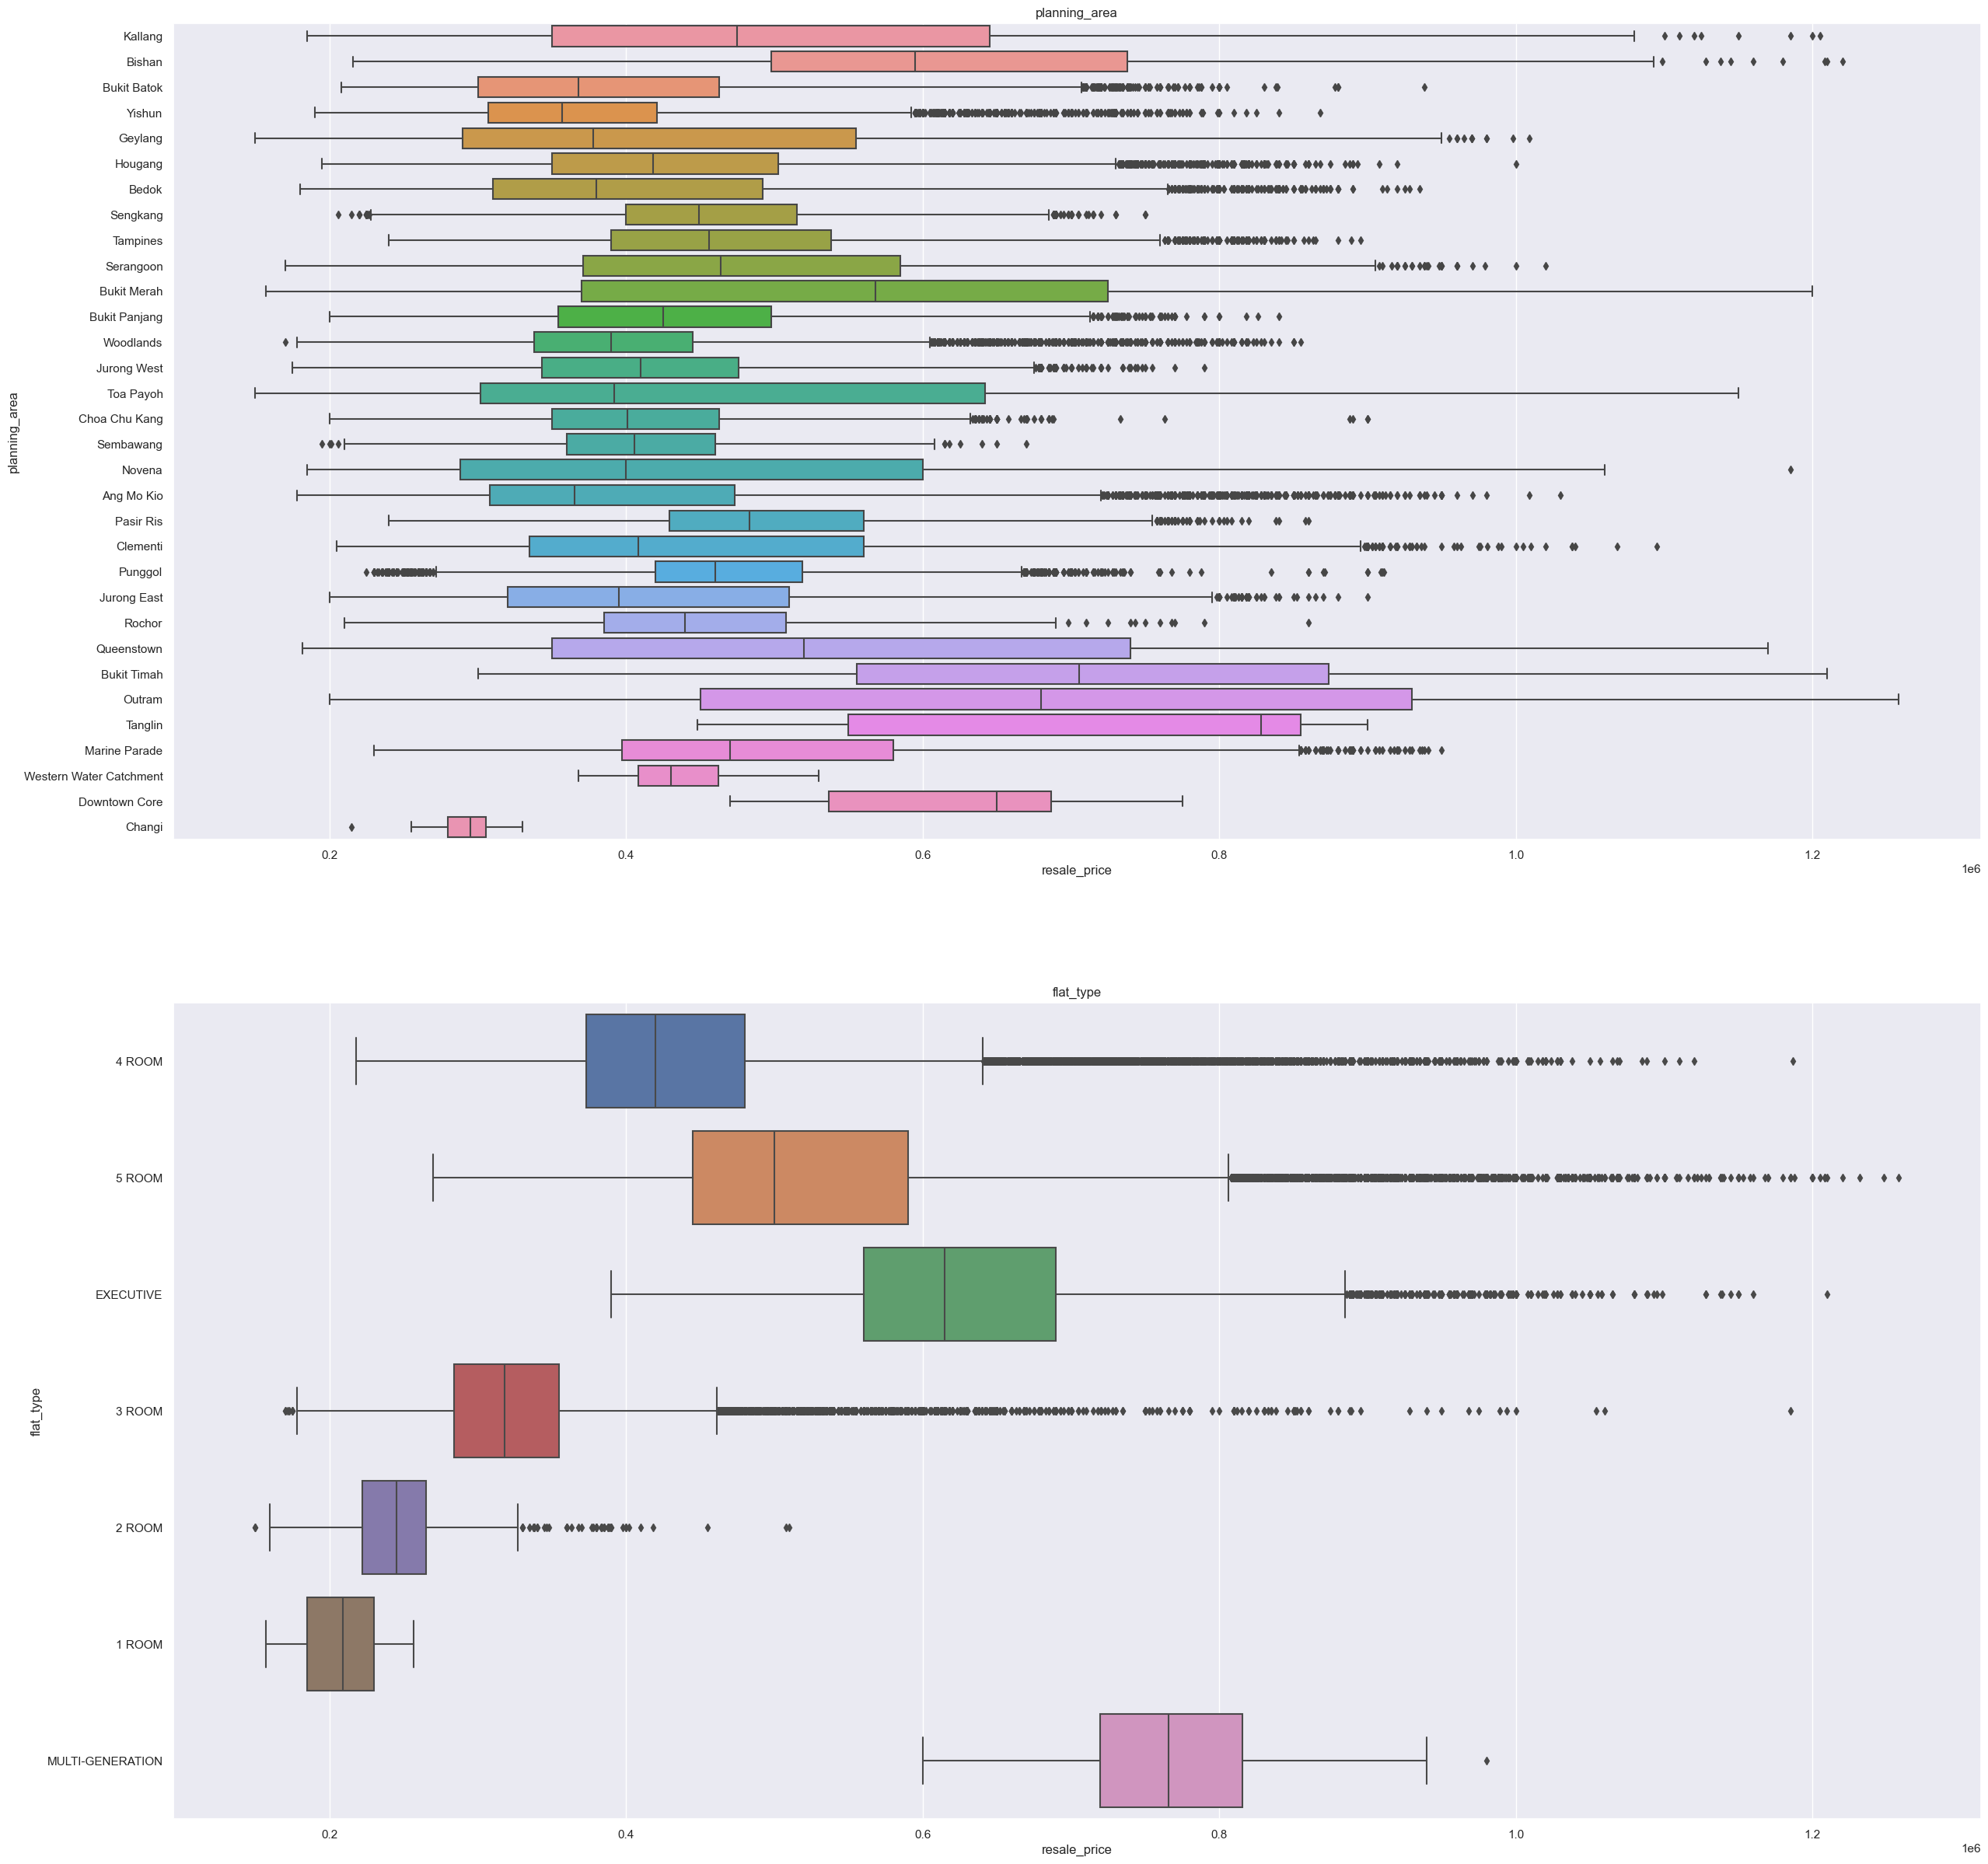

In [80]:
# Create boxplots to visualize categorical variables (planning area & flat_type)
cat_col = ['planning_area', 'flat_type']
fig, axes = plt.subplots(2, 1, figsize=(30,30))
for i, col in enumerate(cat_col):
    sns.boxplot(data=train_clean, x='resale_price', y=col, ax=axes[i])
    sns.set_theme()
    axes[i].set_title(col)
plt.show()

#### Correlation (for Feature Engineering)

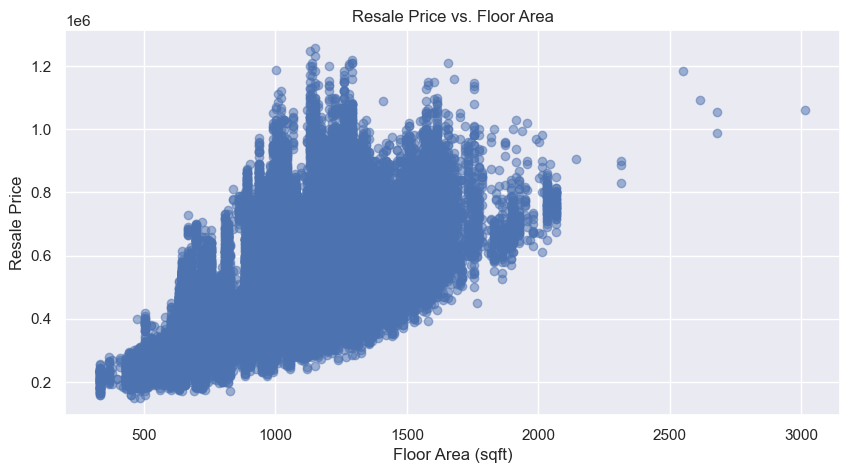

Correlation coefficient for resale price and floor area: 0.6541201494160905


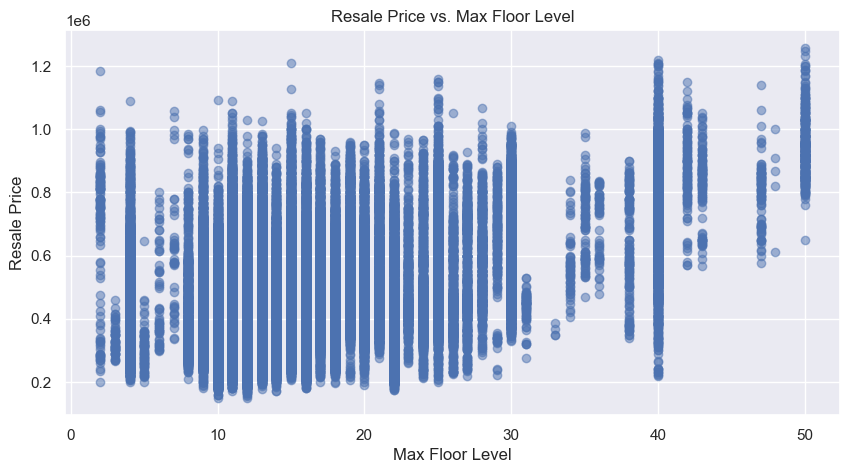

Correlation coefficient for resale price and max floor level: 0.4956498796621424


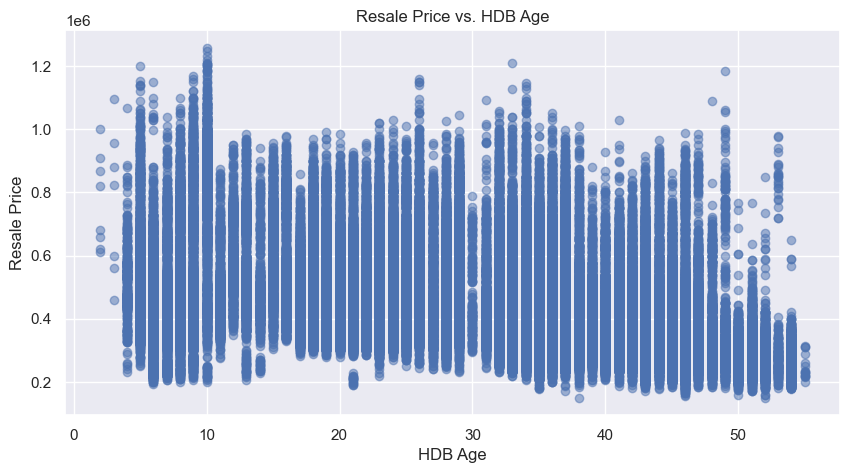

Correlation coefficient for resale price and HDB age: -0.35033736490448353


In [81]:
# Scatter plot for resale_price and floor_area_sqft
plt.figure(figsize=(10, 5))
plt.scatter(train_clean['floor_area_sqft'], train_clean['resale_price'], alpha=0.5)
plt.title('Resale Price vs. Floor Area')
plt.xlabel('Floor Area (sqft)')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()

# Print the correlation coefficient for resale_price and floor_area_sqft
corr_coeff_floor_area = train_clean['resale_price'].corr(train_clean['floor_area_sqft'])
print(f"Correlation coefficient for resale price and floor area: {corr_coeff_floor_area}")

# Scatter plot for resale_price and max_floor_lvl
plt.figure(figsize=(10, 5))
plt.scatter(train_clean['max_floor_lvl'], train_clean['resale_price'], alpha=0.5)
plt.title('Resale Price vs. Max Floor Level')
plt.xlabel('Max Floor Level')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()

# Print the correlation coefficient for resale_price and max_floor_lvl
corr_coeff_max_floor = train_clean['resale_price'].corr(train_clean['max_floor_lvl'])
print(f"Correlation coefficient for resale price and max floor level: {corr_coeff_max_floor}")

# Scatter plot for resale_price and hdb_age
plt.figure(figsize=(10, 5))
plt.scatter(train_clean['hdb_age'], train_clean['resale_price'], alpha=0.5)
plt.title('Resale Price vs. HDB Age')
plt.xlabel('HDB Age')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()

# Print the correlation coefficient for resale_price and hdb_age
corr_coeff_hdb_age = train_clean['resale_price'].corr(train_clean['hdb_age'])
print(f"Correlation coefficient for resale price and HDB age: {corr_coeff_hdb_age}")

General Correlation Coefficients:
Resale price & floor area correlation: 0.65
Resale price & max Floor Level correlation: 0.50
Resale price & HDB age correlation: -0.35


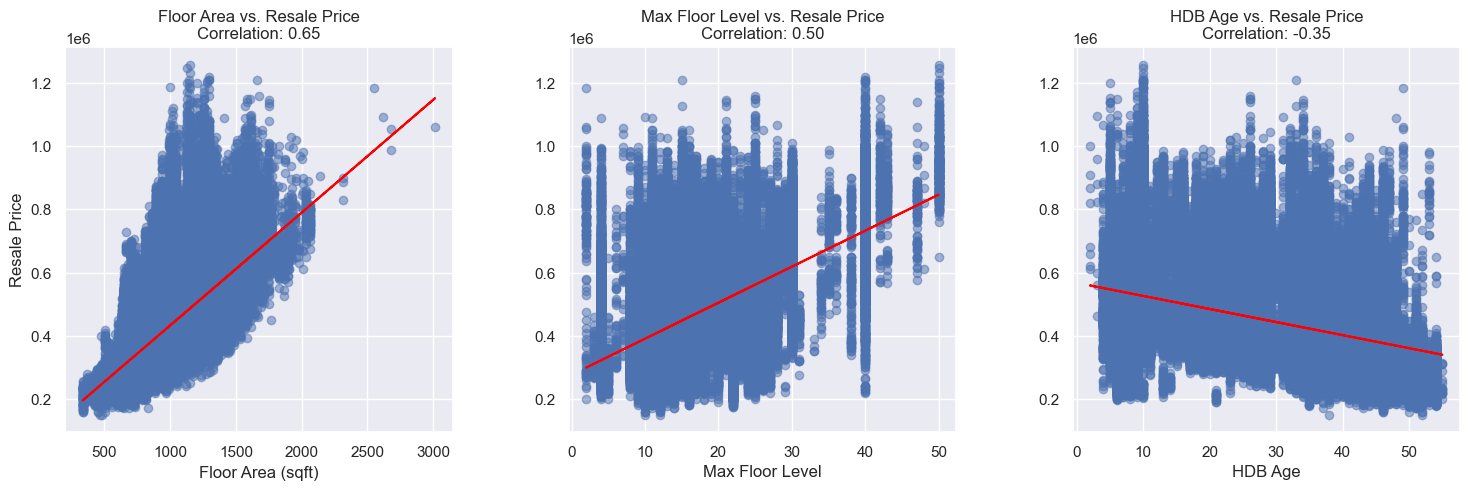

In [82]:
# Calculate correlation coefficients of resale_price to the 3 key features (floor_area_sqft, max_floor_lvl, hdb_age) 
corr_floor_area_all = train_clean['resale_price'].corr(train_clean['floor_area_sqft'])
corr_max_floor_all = train_clean['resale_price'].corr(train_clean['max_floor_lvl'])
corr_hdb_age_all = train_clean['resale_price'].corr(train_clean['hdb_age'])

print("General Correlation Coefficients:")
print(f"Resale price & floor area correlation: {corr_floor_area_all:.2f}")
print(f"Resale price & max Floor Level correlation: {corr_max_floor_all:.2f}")
print(f"Resale price & HDB age correlation: {corr_hdb_age_all:.2f}")

# Set up the matplotlib figure
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot and correlation line for resale_price and floor_area_sqft
axs[0].scatter(train_clean['floor_area_sqft'], train_clean['resale_price'], alpha=0.5)
slope, intercept = np.polyfit(train_clean['floor_area_sqft'], train_clean['resale_price'], 1)
axs[0].plot(train_clean['floor_area_sqft'], slope * train_clean['floor_area_sqft'] + intercept, color='red')
axs[0].set_title(f'Floor Area vs. Resale Price\nCorrelation: {corr_floor_area_all:.2f}')
axs[0].set_xlabel('Floor Area (sqft)')
axs[0].set_ylabel('Resale Price')

# Scatter plot and correlation line for resale_price and max_floor_lvl
axs[1].scatter(train_clean['max_floor_lvl'], train_clean['resale_price'], alpha=0.5)
slope, intercept = np.polyfit(train_clean['max_floor_lvl'], train_clean['resale_price'], 1)
axs[1].plot(train_clean['max_floor_lvl'], slope * train_clean['max_floor_lvl'] + intercept, color='red')
axs[1].set_title(f'Max Floor Level vs. Resale Price\nCorrelation: {corr_max_floor_all:.2f}')
axs[1].set_xlabel('Max Floor Level')

# Scatter plot and correlation line for resale_price and hdb_age
axs[2].scatter(train_clean['hdb_age'], train_clean['resale_price'], alpha=0.5)
slope, intercept = np.polyfit(train_clean['hdb_age'], train_clean['resale_price'], 1)
axs[2].plot(train_clean['hdb_age'], slope * train_clean['hdb_age'] + intercept, color='red')
axs[2].set_title(f'HDB Age vs. Resale Price\nCorrelation: {corr_hdb_age_all:.2f}')
axs[2].set_xlabel('HDB Age')

# Fine-tune figure; make subplots farther from each other.
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

Central Region Correlation Coefficients:
Resale price & floor area correlation: 0.82
Resale price & max Floor Level correlation: 0.62
Resale price & HDB age correlation: -0.72


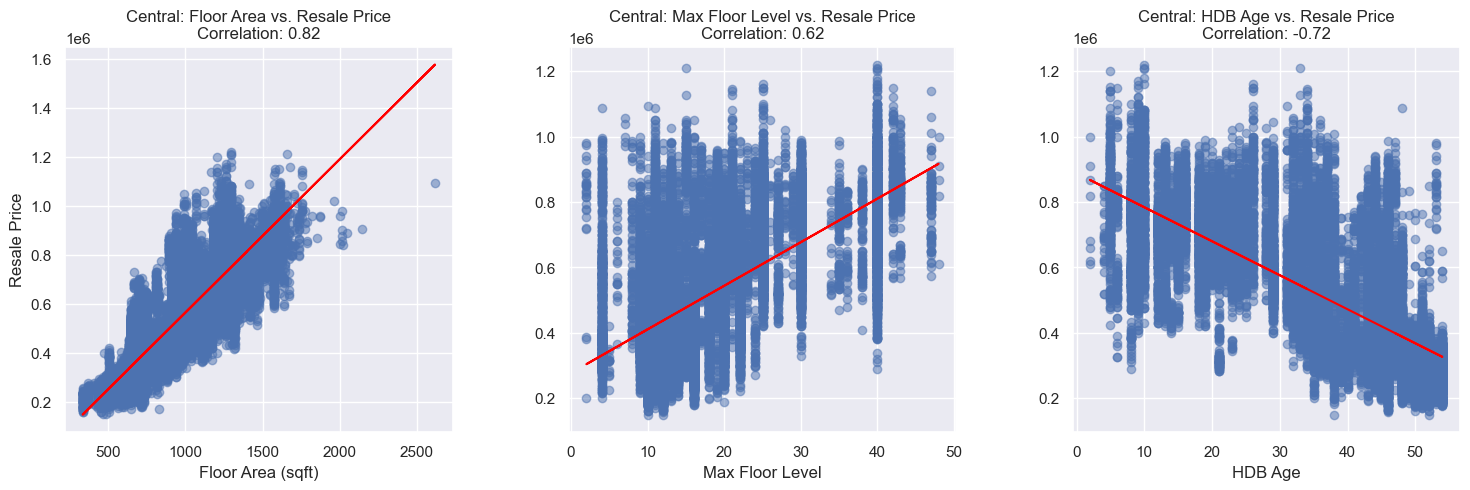

In [83]:
# Calculate correlation coefficients of resale_price to the 3 key features (floor_area_sqft, max_floor_lvl, hdb_age) [Central Region only]

# Define Central Regions
central_regions = ['BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'DOWNTOWN CORE', 'GEYLANG', 'KALLANG', 
                   'MARINE PARADE', 'NOVENA', 'OUTRAM', 'QUEENSTOWN', 'ROCHOR', 'TANGLIN', 'TOA PAYOH']

# Filter dataset for Central Region only
central_df = train_clean[train_clean['town'].isin(central_regions)]

# Calculate correlation coefficients for the Central region dataset
corr_floor_area_central = central_df['resale_price'].corr(central_df['floor_area_sqft'])
corr_max_floor_central = central_df['resale_price'].corr(central_df['max_floor_lvl'])
corr_hdb_age_central = central_df['resale_price'].corr(central_df['hdb_age'])

print("Central Region Correlation Coefficients:")
print(f"Resale price & floor area correlation: {corr_floor_area_central:.2f}")
print(f"Resale price & max Floor Level correlation: {corr_max_floor_central:.2f}")
print(f"Resale price & HDB age correlation: {corr_hdb_age_central:.2f}")

# Set up the matplotlib figure for Central region
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot and correlation line for resale_price and floor_area_sqft in Central region
axs[0].scatter(central_df['floor_area_sqft'], central_df['resale_price'], alpha=0.5)
slope, intercept = np.polyfit(central_df['floor_area_sqft'], central_df['resale_price'], 1)
axs[0].plot(central_df['floor_area_sqft'], slope * central_df['floor_area_sqft'] + intercept, color='red')
axs[0].set_title(f'Central: Floor Area vs. Resale Price\nCorrelation: {corr_floor_area_central:.2f}')
axs[0].set_xlabel('Floor Area (sqft)')
axs[0].set_ylabel('Resale Price')

# Scatter plot and correlation line for resale_price and max_floor_lvl in Central region
axs[1].scatter(central_df['max_floor_lvl'], central_df['resale_price'], alpha=0.5)
slope, intercept = np.polyfit(central_df['max_floor_lvl'], central_df['resale_price'], 1)
axs[1].plot(central_df['max_floor_lvl'], slope * central_df['max_floor_lvl'] + intercept, color='red')
axs[1].set_title(f'Central: Max Floor Level vs. Resale Price\nCorrelation: {corr_max_floor_central:.2f}')
axs[1].set_xlabel('Max Floor Level')

# Scatter plot and correlation line for resale_price and hdb_age in Central region
axs[2].scatter(central_df['hdb_age'], central_df['resale_price'], alpha=0.5)
slope, intercept = np.polyfit(central_df['hdb_age'], central_df['resale_price'], 1)
axs[2].plot(central_df['hdb_age'], slope * central_df['hdb_age'] + intercept, color='red')
axs[2].set_title(f'Central: HDB Age vs. Resale Price\nCorrelation: {corr_hdb_age_central:.2f}')
axs[2].set_xlabel('HDB Age')

# Fine-tune figure; make subplots farther from each other.
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


[BONUS] Correlation between the features
* Floor_Area_Sqft * HDB_Age
* Max_Floor_Lvl * HDB_Age
* Floor_Area_Sqft * Max_Floor_Lvl

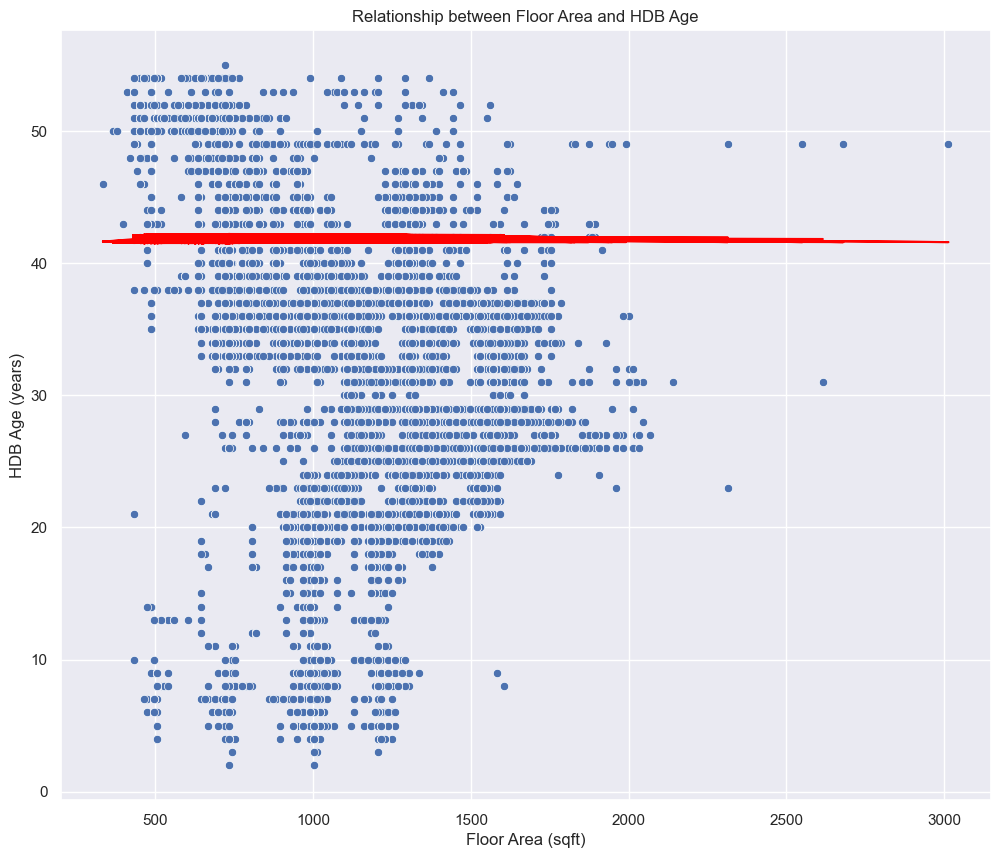

In [84]:
# Floor_Area_Sqft * HDB_Age
plt.figure(figsize=(12, 10))

sns.scatterplot(data=train_clean, x='floor_area_sqft', y='hdb_age')

# Calculate the line of best fit
m, b = np.polyfit(train_clean['floor_area_sqft'], train_clean['hdb_age'], 1)
plt.plot(train_clean['floor_area_sqft'], m * train_clean['hdb_age'] + b, color='red')
# Add titles and labels
plt.title('Relationship between Floor Area and HDB Age')
plt.xlabel('Floor Area (sqft)')
plt.ylabel('HDB Age (years)')

plt.show()

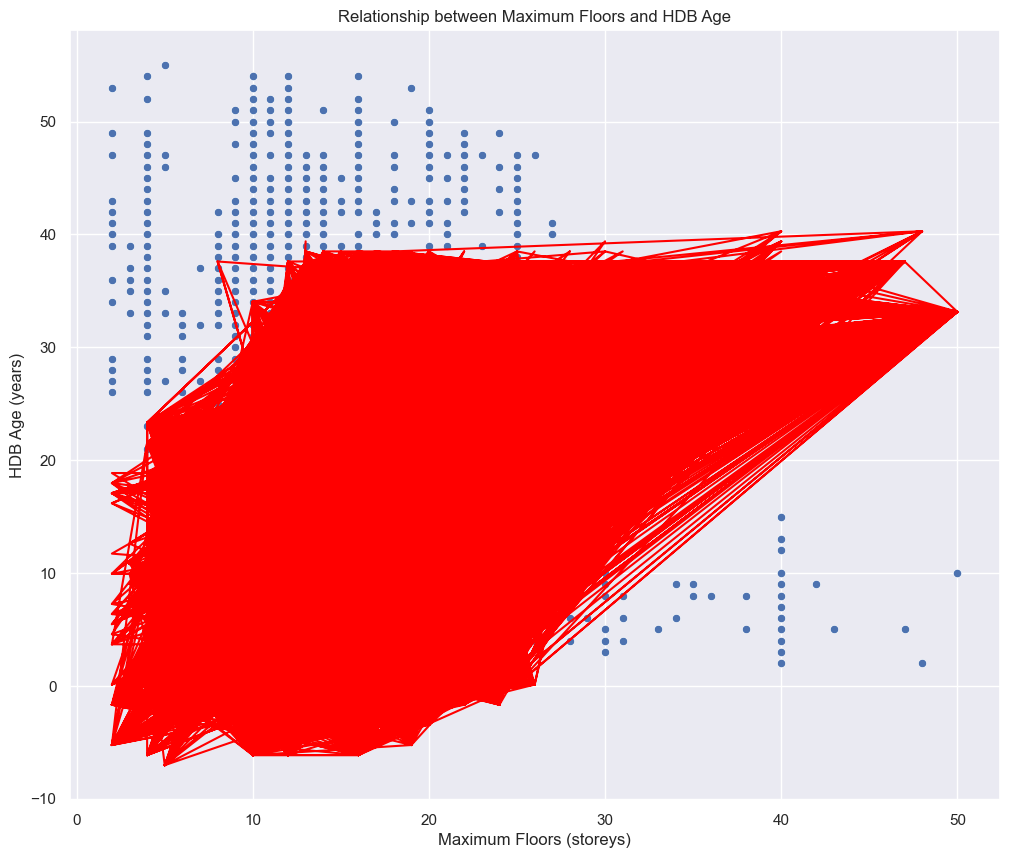

In [85]:
# Max_Floor_Lvl * HDB_Age
plt.figure(figsize=(12, 10))

sns.scatterplot(data=train_clean, x='max_floor_lvl', y='hdb_age')

# Calculate the line of best fit
m, b = np.polyfit(train_clean['max_floor_lvl'], train_clean['hdb_age'], 1)
plt.plot(train_clean['max_floor_lvl'], m * train_clean['hdb_age'] + b, color='red')
# Add titles and labels
plt.title('Relationship between Maximum Floors and HDB Age')
plt.xlabel('Maximum Floors (storeys)')
plt.ylabel('HDB Age (years)')

plt.show()

Text(0, 0.5, 'Maximum Floors (storeys)')

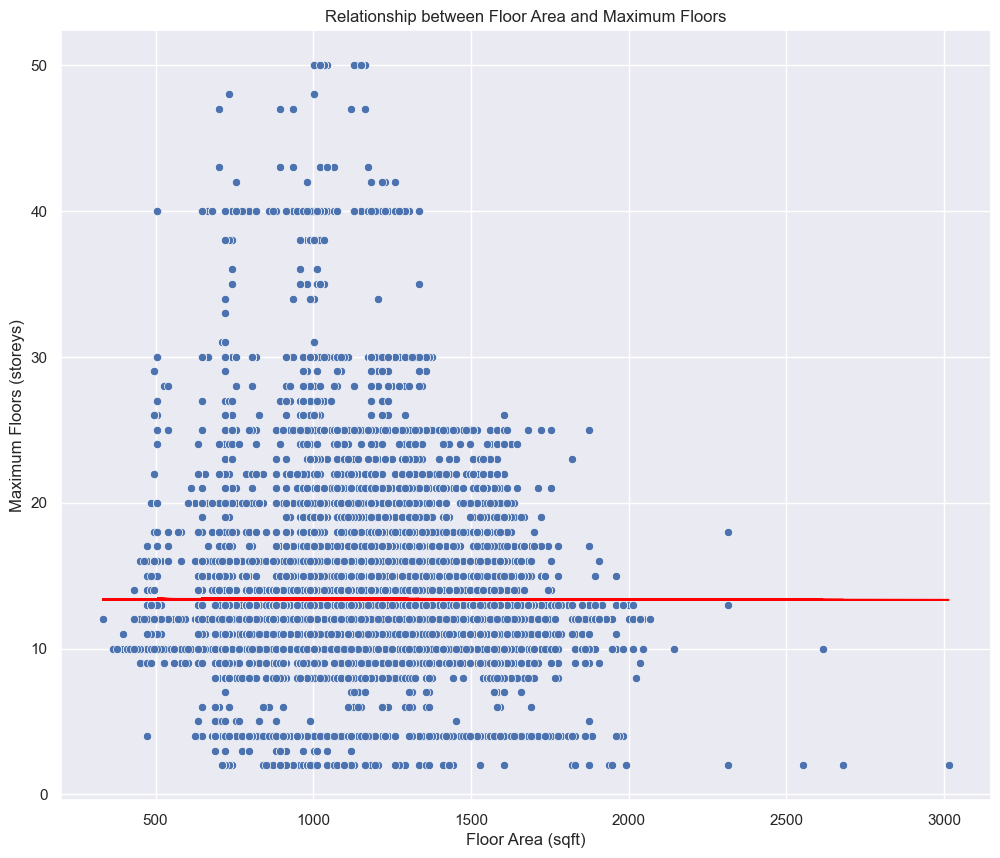

In [86]:
# Floor_Area_Sqft * Max_Floor_Lvl
plt.figure(figsize=(12, 10))

sns.scatterplot(data=train_clean, x='floor_area_sqft', y='max_floor_lvl')

# Calculate the line of best fit
m, b = np.polyfit(train_clean['floor_area_sqft'], train_clean['max_floor_lvl'], 1)
plt.plot(train_clean['floor_area_sqft'], m * train_clean['max_floor_lvl'] + b, color='red')
# Add titles and labels
plt.title('Relationship between Floor Area and Maximum Floors')
plt.xlabel('Floor Area (sqft)')
plt.ylabel('Maximum Floors (storeys)')

## Save EDA and Visualised Data

In [87]:
train_clean.to_csv('datasets/train_edavis.csv',index=False)
test_clean.to_csv('datasets/test_edavis.csv',index=False)